In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
import catboost as cb
import xgboost as xgb
import lightgbm as lgb
import hyperopt as hpo

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Load train and test datasets
train_df = pd.read_csv('data/train/train.csv')
test_df = pd.read_csv('data/test/test.csv')

In [41]:
# show train dataset
train_df.head(10)

enrollee_id      city  city_development_index  gender  \
0        23798  city_149                   0.689    Male   
1        29166   city_83                   0.923    Male   
2           46   city_16                   0.910     NaN   
3        18527   city_64                   0.666    Male   
4        21751  city_100                   0.887     NaN   
5        13342   city_21                   0.624  Female   
6        11746   city_21                   0.624    Male   
7        24127  city_114                   0.926    Male   
8         7615  city_103                   0.920    Male   
9         9676   city_97                   0.925    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   
5  Has relevent experience       no_enrollment        Graduate   
6  Has relevent experience       no_enrollment        Graduate   
7  Has relevent experience       no_enrollment         Masters   
8  Has relevent experience       no_enrollment        Graduate   
9  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3      100-500         Pvt Ltd            1   
1             STEM         14          <10  Funded Startup            1   
2             STEM          6        50-99   Public Sector            2   
3             STEM         14        50-99         Pvt Ltd            1   
4             STEM          8          NaN             NaN            2   
5            Other          8    5000-9999         Pvt Ltd            2   
6             STEM          6       10000+         Pvt Ltd            3   
7             STEM        >20          <10         Pvt Ltd           >4   
8             STEM        >20    1000-4999         Pvt Ltd           >4   
9             STEM        >20    1000-4999         Pvt Ltd           >4   

   training_hours  target  
0             106       0  
1              69       0  
2               4       0  
3              26       0  
4              88       1  
5              34       0  
6              23       1  
7               8       0  
8              10       0  
9              85       0

### Data dictionary
<table style="border-collapse: collapse;" width="800">
<tbody >
<tr style="height: 15.0pt;">
<td style="width: 132.95pt; border: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 15.0pt;" width="177">
<p><strong>Variable</strong></p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 15.0pt;" width="325">
<p><strong>Description</strong></p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>enrollee_id</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Unique ID for enrollee</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>city</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>City code</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>city_development_index</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Developement index of the city (scaled)</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>gender</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Gender</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>relevent_experience</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Relevent experience</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>enrolled_university</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Type of University course enrolled if any</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>education_level</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Education level</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>major_discipline</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Major discipline</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>experience</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Total experience in years</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>company_size</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>No of employees in current employer's company</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>company_type</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Type of current employer</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>last_new_job</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>Difference in years between previous job and current job</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>training_hours</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>training hours completed</p>
</td>
</tr>
<tr style="height: 14.25pt;">
<td style="width: 132.95pt; border-top: none; border-left: solid gray 1.0pt; border-bottom: solid gray 1.0pt; border-right: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="177">
<p>target</p>
</td>
<td style="width: 243.55pt; border: solid gray 1.0pt; border-top: none; padding: 1.4pt 1.4pt 1.4pt 1.4pt; height: 14.25pt;" width="325">
<p>0 – Not looking for job change, 1 – Looking for a job change</p>
</td>
</tr>
</tbody>
</table>

In [5]:
# Datatypes of all columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [6]:
# Every independent varible except 'city_development_index' and 'training_hours' are Categorical variables

### Variable Identification
training_hours :- integer discrete number<br>
city_development_index :- continuous number between 0 & 1. each city has one city_development_index<br>
city :- categorical (nominal)<br>
gender :- categorical (nominal)<br>
relevent_experience :- categorical (nominal)<br>
enrolled_university :- categorical (nominal) maybe we can think of it as an ordinal variable<br>
education_level :- categorical (ordinal)<br>
major_descipline :- categorical (nominal)<br>
company_type :- categorical (nominal)<br>
company_size :- categorical (ordinal)<br>
experience :- categorical (ordinal) less than 1 & greater than 20 are clipped here<br>
last_new_job :- categorical (ordinal). never means only took one job or never took a job.

In [7]:
print("size of train dataset - rows : {} columns : {}".format(train_df.shape[0], train_df.shape[1]))
print("size of test dataset - rows : {} columns : {}".format(test_df.shape[0], test_df.shape[1]))

size of train dataset - rows : 18359 columns : 14
size of test dataset - rows : 15021 columns : 13


In [8]:
# NaN values in Train data
train_df.isnull().sum(axis=0)

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [9]:
# Nan Values in Test data
test_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [10]:
# Target variable
train_df['target'].value_counts(normalize=True)

0    0.867912
1    0.132088
Name: target, dtype: float64

In [11]:
# This is an IMBALANCED dataset
# only 13% enrollees are interested for Job change

### Data check 

#### enrollee_id

In [12]:
# Check if there are more than one records per enrollee_id

In [13]:
train_df['enrollee_id'].nunique() == train_df.shape[0]

True

In [14]:
# In train dataset there is ONLY ONE record per enrollee_id.

In [15]:
# Check if all enrollee_ids in test dataset different from train dataset

In [16]:
len(set(test_df['enrollee_id'].unique()) - set(train_df['enrollee_id'].unique())) == test_df.shape[0]

True

In [17]:
# enrollee_ids in test dataset are ALL Different from train dataset and there is ONLY ONE record per enrollee_id in test dataset
# So, We can't use enrollee_id as a feature or create features based on enrollee_id.
# We have to make a model which can understand remaining features and predict if person is looking for new job or not.
# This is going to be a general model not a user based model.
# Here each records are INDEPENDENT of each other.

### CatBoost - Baseline Model 
#### Public LB : 0.6798716962 roc-auc score

In [18]:
# Here almost all records are in categorical format.
# CatBoost works better when there are more categorical features in dataset.
# and in catboost there is no need to preprocess String data for training, it handles on it's own.
# So, let's make catboost baseline model without data preprocessing.

In [19]:
# CatBoost can't handle NaN & real values or columns which are defined as categorical columns in a Model.
# So, we have to fill NaN values for all categorical variables.

In [20]:
# fill NaN values with -100 so that model can recognize this.
train_df.fillna('-100', inplace=True)
test_df.fillna('-100', inplace=True)

In [21]:
train_df.head()

enrollee_id      city  city_development_index gender  \
0        23798  city_149                   0.689   Male   
1        29166   city_83                   0.923   Male   
2           46   city_16                   0.910   -100   
3        18527   city_64                   0.666   Male   
4        21751  city_100                   0.887   -100   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3      100-500         Pvt Ltd            1   
1             STEM         14          <10  Funded Startup            1   
2             STEM          6        50-99   Public Sector            2   
3             STEM         14        50-99         Pvt Ltd            1   
4             STEM          8         -100            -100            2   

   training_hours  target  
0             106       0  
1              69       0  
2               4       0  
3              26       0  
4              88       1

In [23]:
# features for base model
features_base = [i for i in train_df.columns if i not in ['enrollee_id', 'target']]

In [24]:
features_base

['city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [25]:
# categorical feature indexes for feature_base. used in catboost model for specifying categorical variables.
cat_ind_base = np.where(train_df[features_base].dtypes.isin([np.dtype('O')]))[0]
cat_ind_base

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [28]:
# baseline model object
# Because of the data is imbalanced we have used class_weights. class 0: 0.5, class 1: 3 
base_clf = cb.CatBoostClassifier(eval_metric="AUC",
                                 od_type='Iter',
                                 od_wait=50,
                                 #logging_level='Silent',
                                 class_weights = [0.5, 3]
                                 )

In [29]:
base_clf.fit(train_df[features_base], train_df['target'], cat_features=cat_ind_base)

Learning rate set to 0.038176
0:	total: 124ms	remaining: 2m 3s
1:	total: 240ms	remaining: 1m 59s
2:	total: 359ms	remaining: 1m 59s
3:	total: 481ms	remaining: 1m 59s
4:	total: 601ms	remaining: 1m 59s
5:	total: 725ms	remaining: 2m
6:	total: 810ms	remaining: 1m 54s
7:	total: 921ms	remaining: 1m 54s
8:	total: 1.04s	remaining: 1m 55s
9:	total: 1.16s	remaining: 1m 54s
10:	total: 1.23s	remaining: 1m 50s
11:	total: 1.36s	remaining: 1m 51s
12:	total: 1.46s	remaining: 1m 50s
13:	total: 1.58s	remaining: 1m 51s
14:	total: 1.69s	remaining: 1m 50s
15:	total: 1.82s	remaining: 1m 51s
16:	total: 1.97s	remaining: 1m 53s
17:	total: 2.12s	remaining: 1m 55s
18:	total: 2.26s	remaining: 1m 56s
19:	total: 2.41s	remaining: 1m 58s
20:	total: 2.57s	remaining: 1m 59s
21:	total: 2.72s	remaining: 2m
22:	total: 2.85s	remaining: 2m 1s
23:	total: 3.01s	remaining: 2m 2s
24:	total: 3.11s	remaining: 2m 1s
25:	total: 3.26s	remaining: 2m 2s
26:	total: 3.4s	remaining: 2m 2s
27:	total: 3.48s	remaining: 2m
28:	total: 3.62s	re

In [30]:
# accurcy score on train data
base_clf.score(train_df[features_base], train_df['target'])

0.72247943787788

In [36]:
# roc auc score on train dataset
roc_auc_score(train_df['target'], base_clf.predict_proba(train_df[features_base])[:,1])

0.7223951635548183

In [41]:
# confusion matrix on train dataset
confusion_matrix(train_df['target'], base_clf.predict(train_df[features_base]))

array([[11859,  4075],
       [ 1020,  1405]])

In [37]:
# random seed used by model
base_clf.random_seed_

10048918565048

In [38]:
# number of trees
base_clf.tree_count_

1000

In [39]:
# learning rate of model
base_clf.learning_rate_

0.03817600012

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


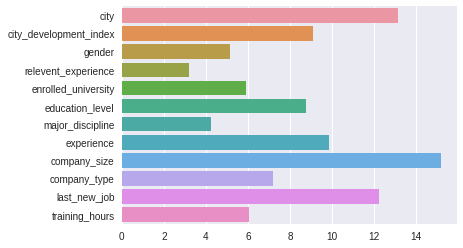

In [32]:
#plot feature importance for each column
sns.barplot(base_clf.feature_importances_, features_base)

In [34]:
# Make submission
sub = pd.read_csv('../data/submissions/sample_submission.csv')
sub['target'] = base_clf.predict_proba(test_df[features_base])[:,1]
sub.to_csv('../data/submissions/cat_base.csv', index=False)

In [125]:
# Public LB score : 0.6798716962 roc-auc score

In [42]:
# for test dataset predictions
(sub['target'] > 0.5).astype('int').value_counts()

0    10544
1     4477
Name: target, dtype: int64

## EDA 

In [1]:
# Here in this data we have so many NaN values. So, I think filing NaN values correctly will give us good results.

In [18]:
# Let's explore data and try to fill missing values

In [4]:
all_data = train_df.append(test_df, ignore_index=True)
all_data = all_data[train_df.columns]

In [44]:
all_data.isnull().sum(axis=0)

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

### Univariate analysis

#### Univariate analysis of Numeric independent variables

In [8]:
city_index = all_data.groupby(['city'])['city_development_index'].first().reset_index()
city_index['city'] = city_index['city'].apply(lambda x: int(x.split('_')[1]))
city_index = city_index.sort_values('city').reset_index(drop=True)

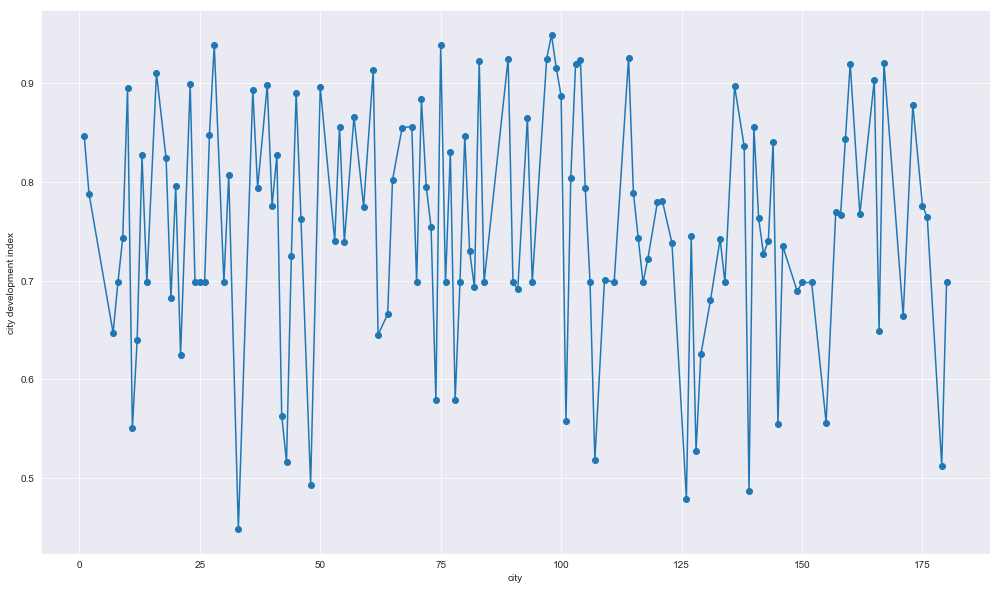

In [9]:
# plot of city development index by their city name
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(17,10))
plt.plot(city_index['city'], city_index['city_development_index'], marker='o')
plt.ylabel('city development index')
plt.xlabel('city')
plt.show()

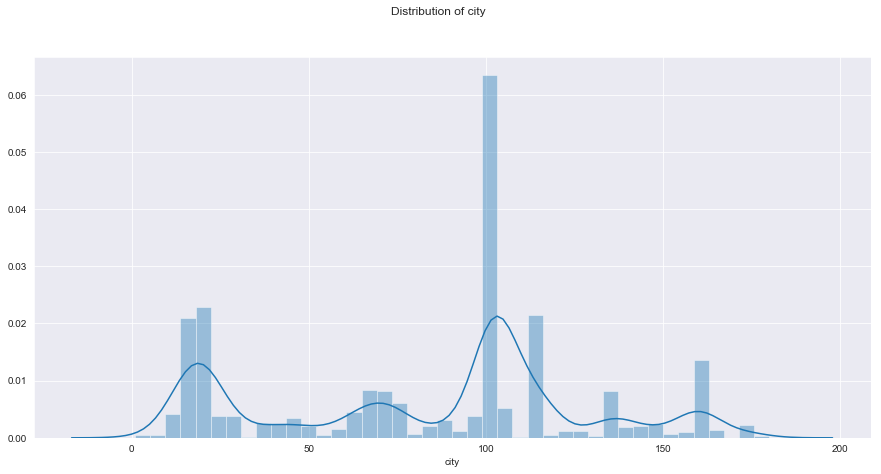

In [10]:
fig, ax = plt.subplots(figsize = (15,7))
ax = sns.distplot(all_data['city'].apply(lambda x: int(x.split('_')[1])), ax=ax)
fig.suptitle('Distribution of city')
plt.show()

In [11]:
# top 10 cities by their counts
city_by_count = all_data['city'].value_counts().reset_index()
city_by_count.columns = ['city', 'count']
city_by_count.head(10)

city  count
0  city_103   7852
1   city_21   3022
2   city_16   2928
3  city_114   2706
4  city_160   1531
5  city_136   1088
6   city_67    821
7   city_75    598
8  city_102    573
9  city_104    555

In [12]:
# function for distribution of numeric independent variables
def plot_numeric(train_se, test_se):
    fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))
    ax = sns.distplot(train_se, ax=axs[0, 0])
    ax.set_title('train dataset')
    ax = sns.distplot(test_se, ax=axs[0, 1])
    ax.set_title('test_dataset')
    sns.boxplot(train_se, ax=axs[1, 0])
    sns.boxplot(test_se, ax=axs[1, 1])
    fig.suptitle('Distribution of ' + train_se.name)
    plt.show()

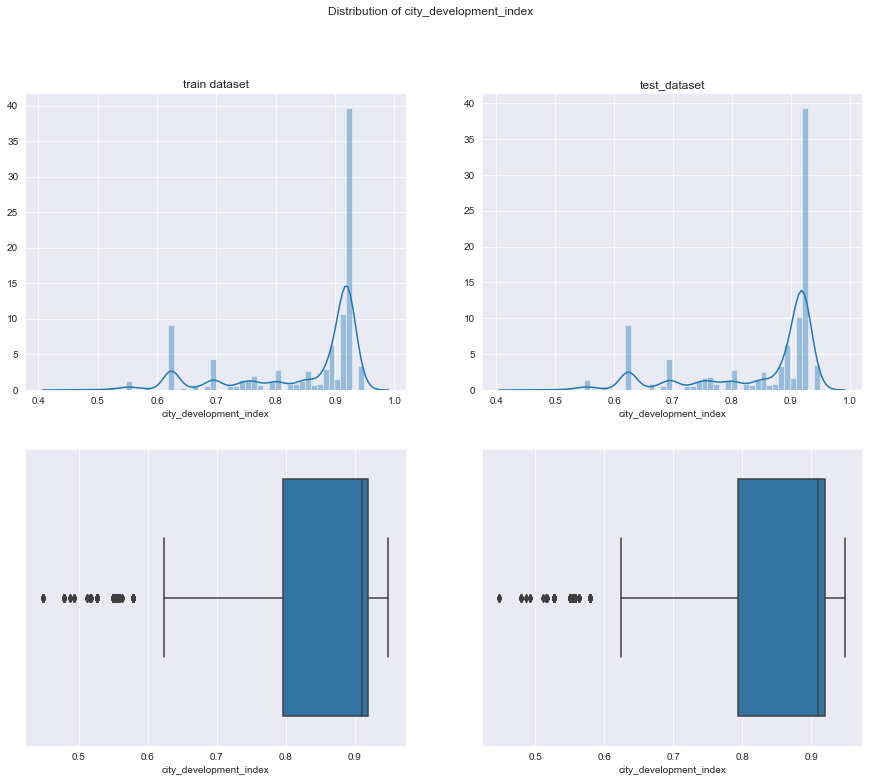

In [13]:
plot_numeric(train_df['city_development_index'], test_df['city_development_index'])

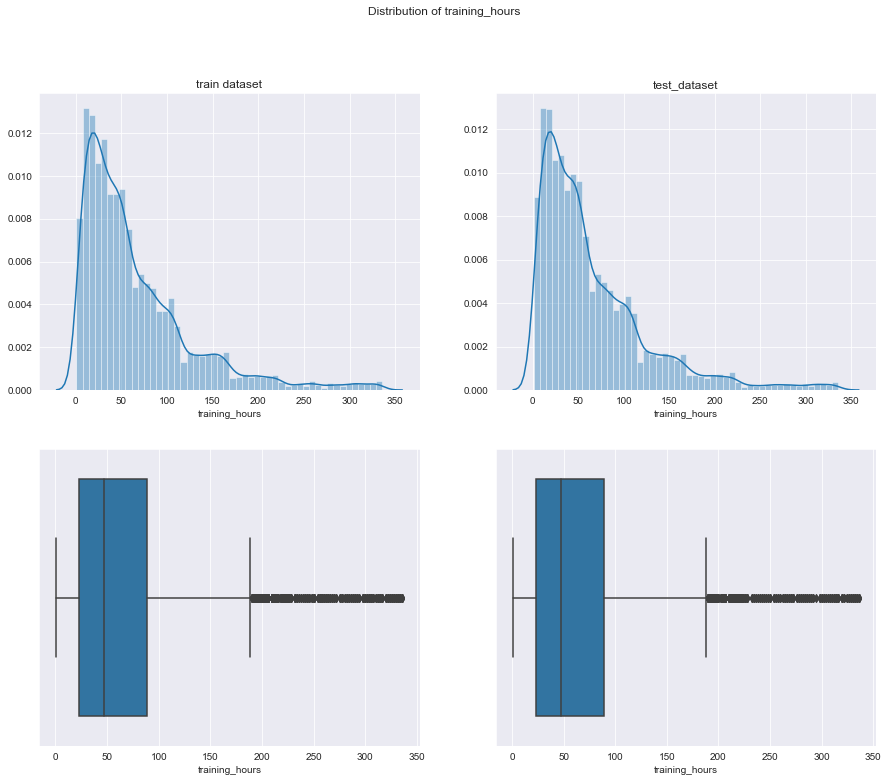

In [14]:
plot_numeric(train_df['training_hours'], test_df['training_hours'])

#### Univariate analysis of categorical variables

In [15]:
def get_order(se):
    '''
        used by categorical_train_test_dist function for getting order or categories by their
        args:
            se : pandas series
    '''
    return np.append(se.value_counts().index, 'missing')


def categorical_train_test_dist(train_df, test_df, cat_cols=None):
    '''
        This function plots distribution of Independent categorical variables which are in train and test dataset.
        args:
            train_df : train dataset in pandas dataframe format
            test_df : test dataset in pandas dataframe format
            col_cols : list or numpy array of names of categorical columns.
                       default is None, so this function will infer all categorical variable and plot graphs.
                        
    '''
    if cat_cols == None:
        cat_cols = test_df.select_dtypes(['object']).columns.values
    nrows = len(cat_cols)
    
    fig, axs = plt.subplots(ncols=2, nrows=nrows, figsize=(15, nrows*6))
    
    for i, col in enumerate(cat_cols):
        if i == 0:
            ax = sns.countplot(train_df[col].fillna('missing'), order=get_order(train_df[col]), ax=axs[i, 0])
            ax.set_title('Train dataset')
            ax = sns.countplot(test_df[col].fillna('missing'), order=get_order(test_df[col]), ax=axs[i, 1])
            ax.set_title('test_dataset')
        else:
            sns.countplot(train_df[col].fillna('missing'), order=get_order(train_df[col]), ax=axs[i, 0])
            sns.countplot(test_df[col].fillna('missing'), order=get_order(test_df[col]), ax=axs[i, 1])
    
    plt.show()

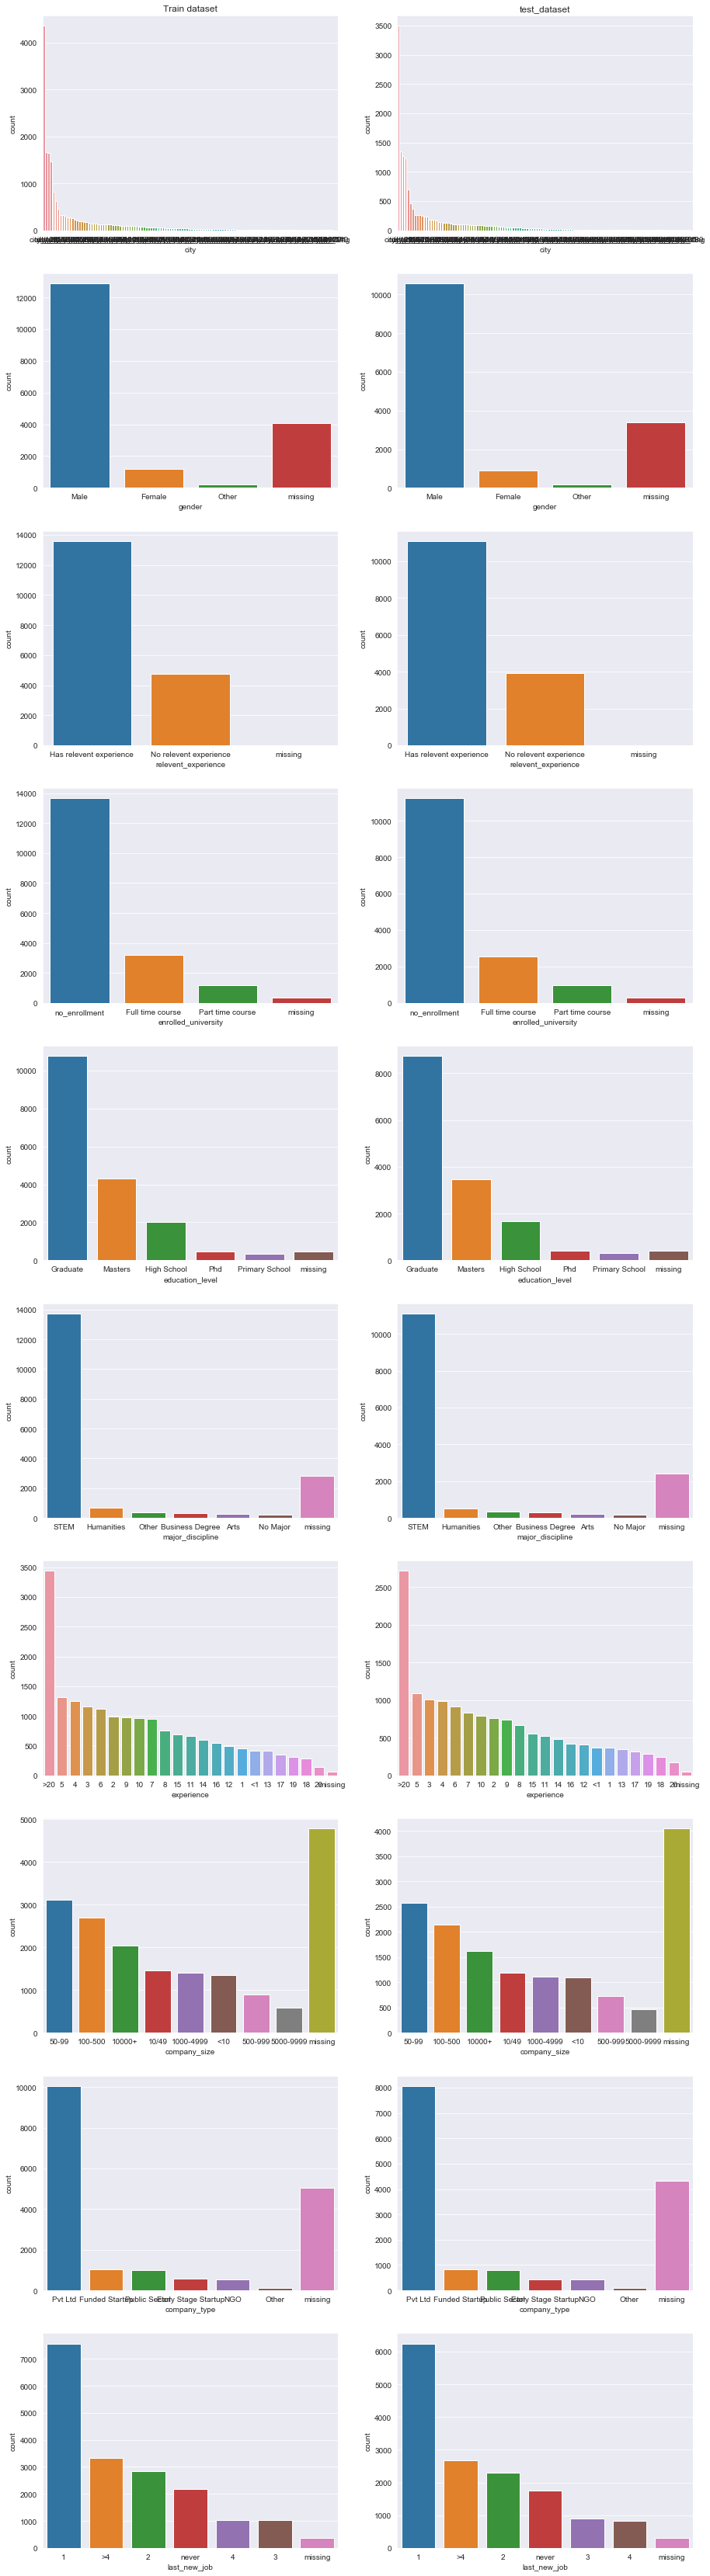

In [16]:
categorical_train_test_dist(train_df, test_df)

### Bivariate analysis

#### All independent categorical variables with target variable 

In [17]:
def cat_with_target(train_df, target_col, cat_cols=None):
    if cat_cols == None:
        cat_cols = train_df.select_dtypes(['object']).columns.values
    ncats = len(cat_cols)
    ncols = 2
    nrows = math.ceil(ncats/ncols)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, nrows*6))

    for i in range(nrows):
        sns.barplot(train_df[cat_cols[i*2]].fillna('missing'), train_df[target_col], ax=axs[i, 0])
        try: 
            sns.barplot(train_df[cat_cols[i*2+1]].fillna('missing'), train_df[target_col], ax=axs[i, 1])
        except:
            pass
    plt.show()

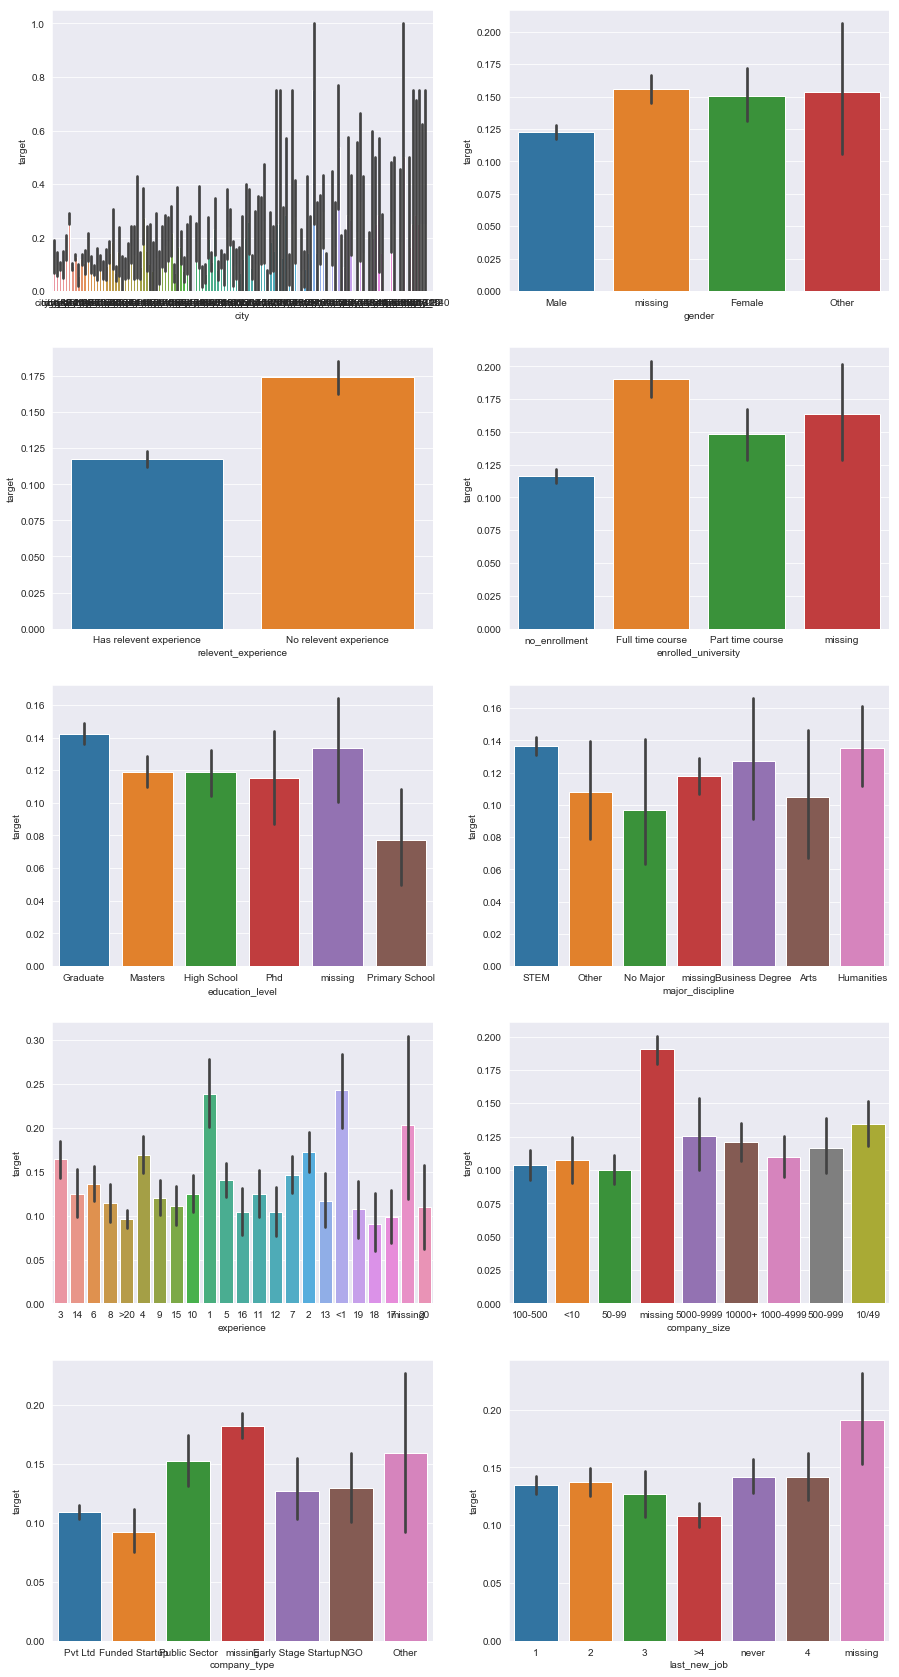

In [18]:
cat_with_target(train_df, 'target')

#### All independent Numeric variables with target variables

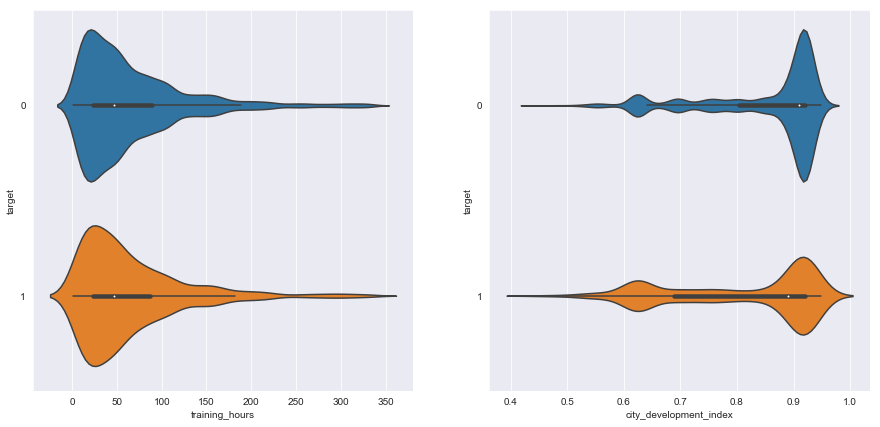

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(15,7))
sns.violinplot(y= train_df['target'], x=train_df['training_hours'], orient='h', ax=axs[0])
sns.violinplot(y= train_df['target'], x=train_df['city_development_index'], orient='h', ax=axs[1])
plt.show()

### label encode data  (ordinal data)

In [20]:
all_data_temp = train_df.append(test_df, ignore_index=True)
all_data_temp = all_data_temp[train_df.columns]

all_data_temp['city'] = all_data_temp['city'].apply(lambda x: int(x.split('_')[1]))

all_data_temp.loc[all_data_temp['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = 0
all_data_temp.loc[all_data_temp['enrolled_university'] == 'Part time course', 'enrolled_university'] = 1
all_data_temp.loc[all_data_temp['enrolled_university'] == 'Full time course', 'enrolled_university'] = 2
all_data_temp['enrolled_university'] = all_data_temp['enrolled_university'].astype('float')

all_data_temp.loc[all_data_temp['education_level'] == 'Primary School', 'education_level'] = 0
all_data_temp.loc[all_data_temp['education_level'] == 'High School', 'education_level'] = 1
all_data_temp.loc[all_data_temp['education_level'] == 'Graduate', 'education_level'] = 2
all_data_temp.loc[all_data_temp['education_level'] == 'Masters', 'education_level'] = 3
all_data_temp.loc[all_data_temp['education_level'] == 'Phd', 'education_level'] = 4
all_data_temp['education_level'] = all_data_temp['education_level'].astype('float')

all_data_temp.loc[all_data_temp['experience'] == '<1', 'experience'] = 0
all_data_temp.loc[all_data_temp['experience'] == '>20', 'experience'] = 21
all_data_temp['experience'] = all_data_temp['experience'].astype('float')

all_data_temp.loc[all_data_temp['company_size'] == '<10', 'company_size'] = 0
all_data_temp.loc[all_data_temp['company_size'] == '10/49', 'company_size'] = 1
all_data_temp.loc[all_data_temp['company_size'] == '50-99', 'company_size'] = 2
all_data_temp.loc[all_data_temp['company_size'] == '100-500', 'company_size'] = 3
all_data_temp.loc[all_data_temp['company_size'] == '500-999', 'company_size'] = 4
all_data_temp.loc[all_data_temp['company_size'] == '1000-4999', 'company_size'] = 5
all_data_temp.loc[all_data_temp['company_size'] == '5000-9999', 'company_size'] = 6
all_data_temp.loc[all_data_temp['company_size'] == '10000+', 'company_size'] = 7
all_data_temp['company_size'] = all_data_temp['company_size'].astype('float')

all_data_temp.loc[all_data_temp['last_new_job'] == 'never', 'last_new_job'] = 0
all_data_temp.loc[all_data_temp['last_new_job'] == '>4', 'last_new_job'] = 5
all_data_temp['last_new_job'] = all_data_temp['last_new_job'].astype('float')

In [21]:
all_data_temp.head()

enrollee_id  city  city_development_index gender      relevent_experience  \
0        23798   149                   0.689   Male  Has relevent experience   
1        29166    83                   0.923   Male  Has relevent experience   
2           46    16                   0.910    NaN  Has relevent experience   
3        18527    64                   0.666   Male  Has relevent experience   
4        21751   100                   0.887    NaN   No relevent experience   

   enrolled_university  education_level major_discipline  experience  \
0                  0.0              2.0             STEM         3.0   
1                  0.0              2.0             STEM        14.0   
2                  0.0              2.0             STEM         6.0   
3                  0.0              2.0             STEM        14.0   
4                  0.0              3.0             STEM         8.0   

   company_size    company_type  last_new_job  training_hours  target  
0           3.0         Pvt Ltd           1.0             106     0.0  
1           0.0  Funded Startup           1.0              69     0.0  
2           2.0   Public Sector           2.0               4     0.0  
3           2.0         Pvt Ltd           1.0              26     0.0  
4           NaN             NaN           2.0              88     1.0

In [22]:
# label encoding of categorical data
for col in ['gender', 'relevent_experience', 'major_discipline', 'company_type']:
    le = LabelEncoder()
    le.fit(all_data_temp[col].fillna('unknown'))
    all_data_temp[col] = le.transform(all_data_temp[col].fillna('unknown')).astype('float')

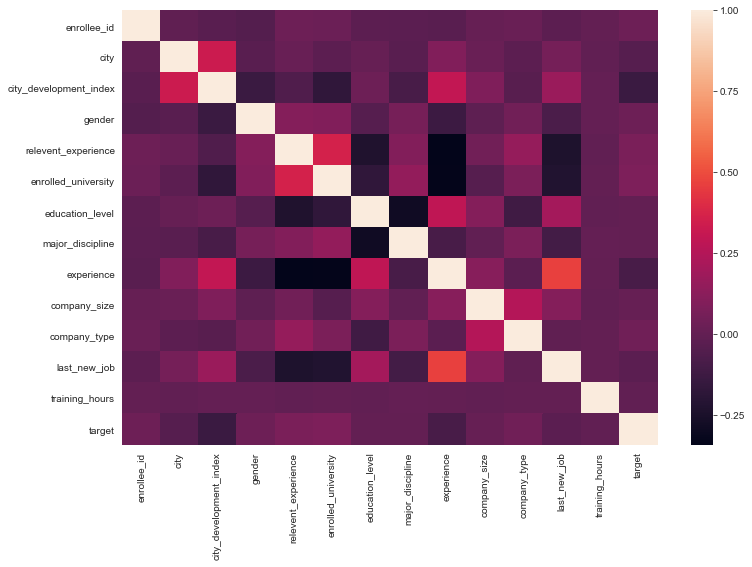

In [23]:
# feature importance of all data
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(all_data_temp.corr(), ax=ax)
plt.show()
# target variable is not highly dependent on any features

### Filling missing values of company_size and company_type 

In [5]:
# hypothesis :
# if company_size and company_type both are missing then there are high chances that enrollee is unemployed.
# but there are also some possibility that enrollee doesn't want to reveal this details.

In [6]:
# number of records with missing value in company_size
all_data['company_size'].isnull().sum()

8830

In [7]:
# number of records with missing value in company_type
all_data['company_type'].isnull().sum()

9369

In [8]:
train_df[(train_df['company_size'].isnull()) & (train_df['company_type'].isnull())]['target'].value_counts(normalize=True)

0    0.802588
1    0.197412
Name: target, dtype: float64

In [9]:
train_df[~((train_df['company_size'].isnull()) & (train_df['company_type'].isnull()))]['target'].value_counts(normalize=True)

0    0.887589
1    0.112411
Name: target, dtype: float64

In [10]:
# according to this we can say that enrollee who has missig value at both company_size and company_type has higher chance of Job change.
# we can fill missing values for company_size and company_tye if either of one is present.

In [11]:
# Let's go with: if company_size and company_type both are missing then there are high chance that enrollee is unemployed.for now.

In [12]:
# fill 'unemployed' for company_sze and company_type where both of them are missing 

In [13]:
all_data.loc[all_data[(all_data['company_size'].isnull()) & (all_data['company_type'].isnull())].index, ['company_size', 'company_type']] = 'unemployed'

In [14]:
# now for missing company_size fill it based on company_type

In [15]:
all_data[all_data['company_size'].isnull()]['company_type'].value_counts()

Pvt Ltd                718
Public Sector          186
NGO                     45
Other                   12
Funded Startup           9
Early Stage Startup      5
Name: company_type, dtype: int64

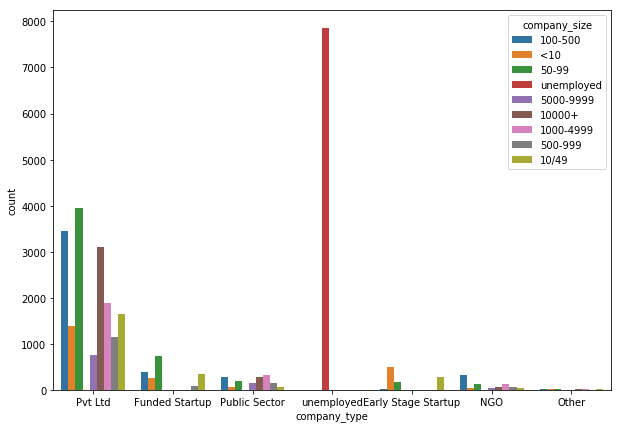

In [16]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.countplot(all_data['company_type'], hue=all_data['company_size'], ax=ax)
plt.show()

In [17]:
# from this graph based on company_type we can put mode (freqvent) value for company_size

In [18]:
# fill NaN of company_size
all_data.loc[all_data['company_type'] == 'Pvt Ltd', 'company_size'] = '50-99'
all_data.loc[all_data['company_type'] == 'Public Sector', 'company_size'] = '1000-4999'
all_data.loc[all_data['company_type'] == 'NGO', 'company_size'] = '100-500'
all_data.loc[all_data['company_type'] == 'Other', 'company_size'] = '50-99'
all_data.loc[all_data['company_type'] == 'Funded Startup', 'company_size'] = '50-99'
all_data.loc[all_data['company_type'] == 'Early Stage Startup', 'company_size'] = '<10'

In [19]:
# Now no missing values in company_size
all_data['company_size'].isnull().sum()

0

In [20]:
# fill missing values of company_type from company_size

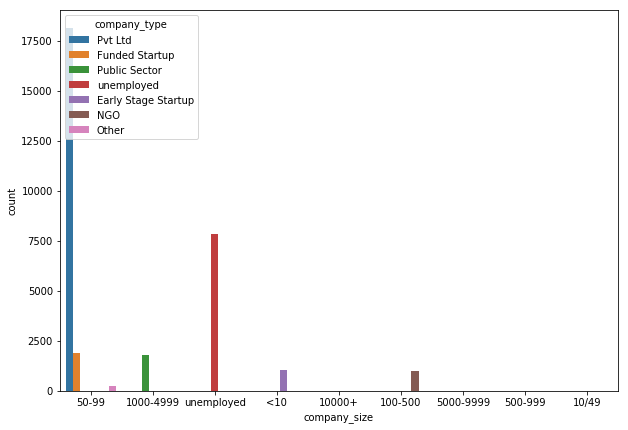

In [21]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.countplot(all_data['company_size'], hue=all_data['company_type'], ax=ax)
plt.show()

In [22]:
# for any size of company there are high chance that it is Pvt Ltd company.

In [23]:
# fill Pvt Ltd where company_type is missing 
all_data.loc[all_data['company_type'].isnull(), 'company_type'] = 'Pvt Ltd'

In [24]:
# now no missing values in company_type
all_data['company_type'].isnull().sum()

0

### Filling missing value of experience and last_new_job

In [25]:
# fill missing values of experience
# there are 103 records with missing value in experience column
# there are 671 records with missing value in last_new_job column
# there are 37 records with missing value both in experience and last_new_job column

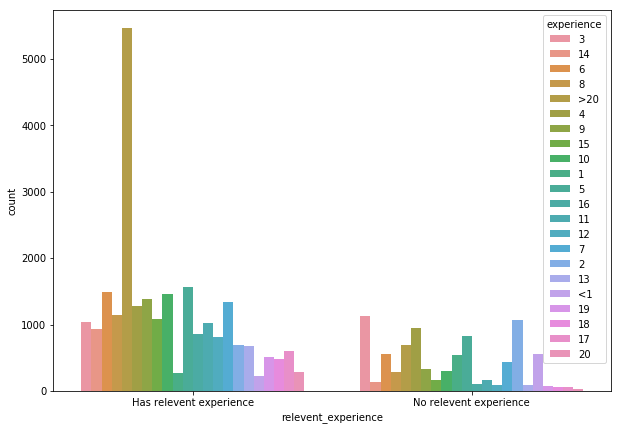

In [26]:
# fill missing value of experience based on relevent_experience column
fig , ax = plt.subplots(figsize=(10,7))
sns.countplot(all_data['relevent_experience'], hue=all_data['experience'], ax=ax)
plt.show()

In [27]:
# for records with missing value in experience and has some relevent experience has high chance to job change than general population
train_df[train_df['experience'].isnull() & (train_df['relevent_experience'] == 'Has relevent experience')]['target'].value_counts(normalize=True)

0    0.780488
1    0.219512
Name: target, dtype: float64

In [28]:
# no relevent experience less chance to job change
train_df[train_df['experience'].isnull() & (train_df['relevent_experience'] == 'No relevent experience')]['target'].value_counts(normalize=True)

0    0.833333
1    0.166667
Name: target, dtype: float64

In [29]:
train_df[(train_df['experience'] == '1') & (train_df['relevent_experience'] == 'Has relevent experience')]['target'].value_counts(normalize=True)

0    0.748252
1    0.251748
Name: target, dtype: float64

In [30]:
train_df[(train_df['experience'] == '3') & (train_df['relevent_experience'] == 'No relevent experience')]['target'].value_counts(normalize=True)

0    0.839527
1    0.160473
Name: target, dtype: float64

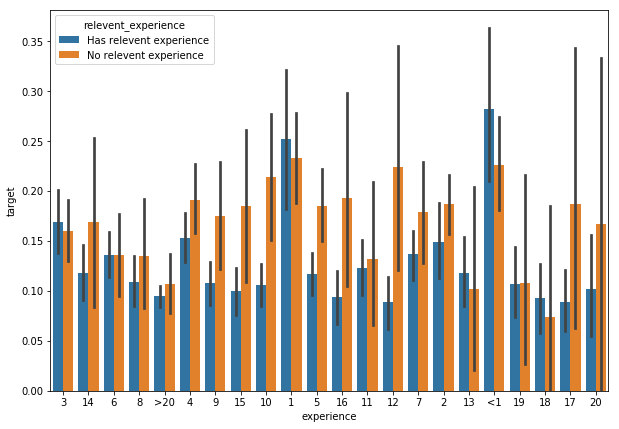

In [31]:
fig , ax = plt.subplots(figsize=(10,7))
sns.barplot(train_df['experience'], train_df['target'], hue=train_df['relevent_experience'], ax=ax)
plt.show()

In [32]:
# so if enrollee has relevent experience then fill experience with 1
# if enrollee has no relevent experience then fill experience with 3

In [33]:
all_data.loc[(all_data['relevent_experience'] == 'Has relevent experience') & (all_data['experience'].isnull()), 'experience'] = '1'
all_data.loc[(all_data['relevent_experience'] == 'No relevent experience') & (all_data['experience'].isnull()), 'experience'] = '3'

In [34]:
# no missing values in experience column
all_data['experience'].isnull().sum()

0

In [35]:
# fill missing values of last_new_job column

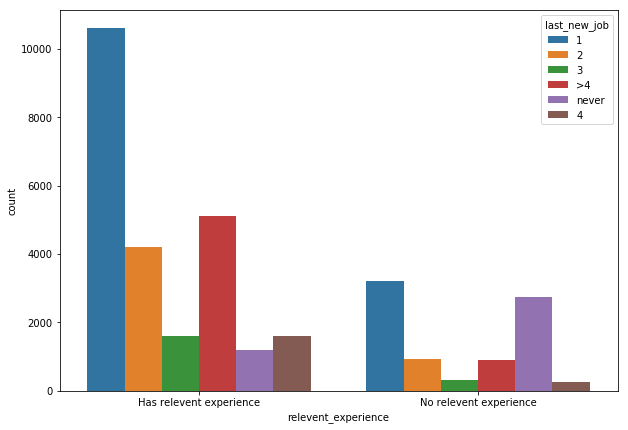

In [36]:
fig , ax = plt.subplots(figsize=(10,7))
sns.countplot(all_data['relevent_experience'], hue=all_data['last_new_job'], ax=ax)
plt.show()

has relevent experience


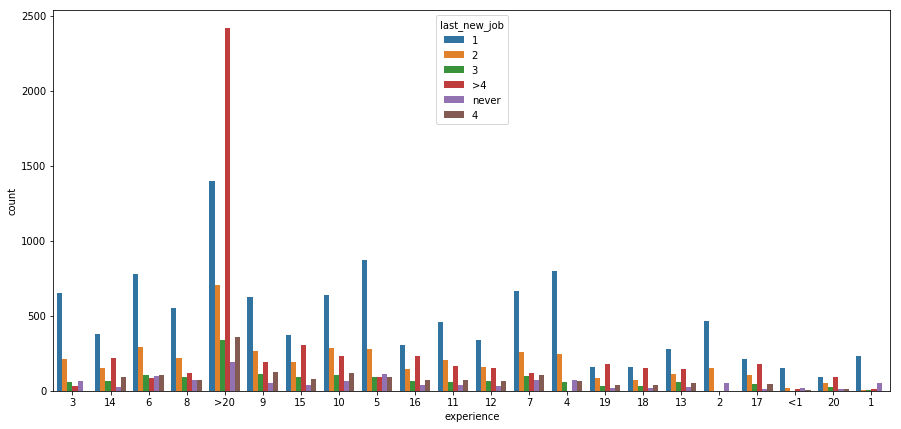

In [37]:
print('has relevent experience')
fig , ax = plt.subplots(figsize=(15,7))
sns.countplot(all_data[all_data['relevent_experience']=='Has relevent experience']['experience'], hue=all_data['last_new_job'], ax=ax)
plt.show()

does not has relevent experience


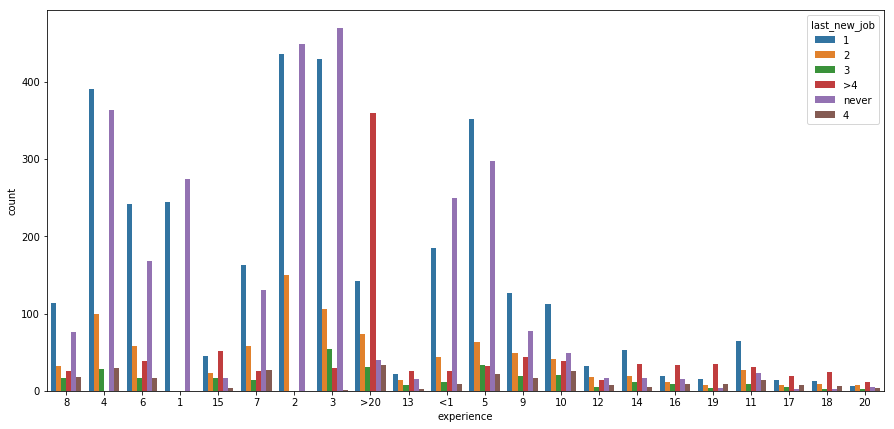

In [38]:
print('does not has relevent experience')
fig , ax = plt.subplots(figsize=(15,7))
sns.countplot(all_data[all_data['relevent_experience']=='No relevent experience']['experience'], hue=all_data['last_new_job'], ax=ax)
plt.show()

In [39]:
# if has relevent experience and experience is 1 or <1 then - last_new_job = never
# if has relevent experience and experience is not  1 or <1 then - last_new_job = 1
# if has no relevent experience  then - last_new_job = 1

In [40]:
all_data.loc[(all_data['last_new_job'].isnull()) & (all_data['relevent_experience']=='Has relevent experience') & (all_data['experience'].isin(['1', '<1'])), 'last_new_job'] = 'never'
all_data.loc[(all_data['last_new_job'].isnull()) & (all_data['relevent_experience']=='Has relevent experience'), 'last_new_job'] = '1'
all_data.loc[(all_data['last_new_job'].isnull()) & (all_data['relevent_experience']=='No relevent experience'), 'last_new_job'] = '1'

In [41]:
# now no missing values in last_new_job
all_data['last_new_job'].isnull().sum()

0

### Filling missing values for major_discipline column, education_level & enrolled_university

In [42]:
# major_discipline is dependent on education_level

##### Missing that depends on the missing value itself:

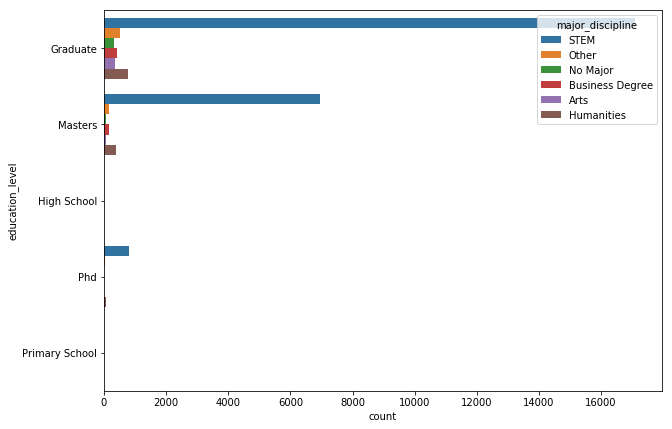

In [43]:
fig, axs = plt.subplots(figsize=(10, 7))
sns.countplot(y=all_data['education_level'], hue=all_data['major_discipline'], ax=axs)
plt.show()

In [44]:
all_data[all_data['education_level'] == 'High School'].shape

(3708, 14)

In [45]:
all_data[all_data['education_level'] == 'High School']['major_discipline'].isnull().sum()

3708

In [46]:
# records which has 'education_level' values 'High School' they all has missing values for 'major_discipline'.
# This indicates that every enrollee who has education_level of High School doesn't has any major discipline.
# because in graduate and higher level of study you get to study about some major descipline.
# Fill these with 'can not have'

In [47]:
# Fill 'can not have' to this positions 
all_data.loc[all_data[all_data['education_level'] == 'High School'].index, 'major_discipline'] = 'can not have'

In [48]:
all_data[all_data['education_level'] == 'Primary School'].shape

(630, 14)

In [49]:
all_data[all_data['education_level'] == 'Primary School']['major_discipline'].isnull().sum()

630

In [50]:
# Same af for High School. Fill missing values with 'can not have' where education_level is Primary School

In [51]:
# Fill 'can not have' to this positions 
all_data.loc[all_data[all_data['education_level'] == 'Primary School'].index, 'major_discipline'] = 'can not have'

##### missing values because of some other reason for major_discipline

In [52]:
all_data[(all_data['major_discipline'].isnull()) & (all_data['education_level'].isin(['Graduate', 'Masters', 'Phd']))].shape[0]

42

In [53]:
# there are only 42 records which has missing value for major_discipline and eduaction level is Graduate or Masters or Phd.
# we can put STEM for missing values here because majority is STEM 

In [54]:
all_data.loc[all_data[(all_data['major_discipline'].isnull()) & (all_data['education_level'].isin(['Graduate', 'Masters', 'Phd']))].index, 'major_discipline'] = 'STEM'

#### filling missing values of  education_level

In [55]:
# we have to fill missing values for education_level for filling major_discipline

In [56]:
all_data['education_level'].isnull().sum()

852

In [57]:
all_data[(all_data['education_level'].isnull()) & (all_data['major_discipline'].isnull())].shape[0]

851

In [58]:
# so all the records which has missing value for education_level also has missing values for major_discipline except only one record
# do first we have to fill missing values for education_level
# what could be the reasone behinf this education_level missing values

In [59]:
all_data[(all_data['education_level'].isnull()) & (~all_data['major_discipline'].isnull())]

enrollee_id      city  city_development_index gender  \
29416        16554  city_114                   0.926   Male   

           relevent_experience enrolled_university education_level  \
29416  Has relevent experience       no_enrollment             NaN   

      major_discipline experience company_size company_type last_new_job  \
29416             STEM         10        50-99      Pvt Ltd           >4   

       training_hours  target  
29416             145     NaN

In [60]:
# fill education_level for this record with Graduate 

In [61]:
all_data.loc[all_data[(all_data['education_level'].isnull()) & (~all_data['major_discipline'].isnull())].index, 'education_level'] = 'Graduate'

In [62]:
# for these other records where education_level and major_discipline both are missing maybe it is randomly missing or the fact 
# that both are missing at same time indicates something.
# and for 171 records enrolled_university, education_level and major_discipline are empty.
# fill these with 'Not' for both education_level and major_discipline
# because they might not even have education of primary school level. 

In [63]:
all_data.loc[all_data[(all_data['education_level'].isnull()) & (all_data['major_discipline'].isnull())].index, ['education_level', 'major_discipline']] = 'Not'

In [64]:
# now no missing values in major_discipline and education_level column
all_data['education_level'].isnull().sum() + all_data['major_discipline'].isnull().sum()

0

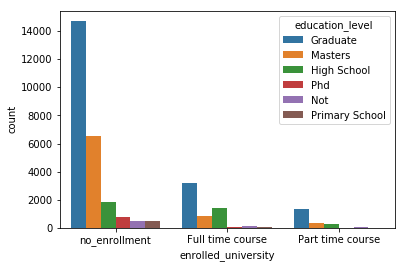

In [65]:
sns.countplot(all_data['enrolled_university'], hue=all_data['education_level'])
plt.show()

####  filling missing values of enrolled_university

In [66]:
# fill 'Other'
# maybe they are not in university but they are doing some other courses or bootcamp.

In [67]:
all_data.loc[all_data['enrolled_university'].isnull(), 'enrolled_university'] = 'Other'

In [68]:
all_data['enrolled_university'].isnull().sum()

0

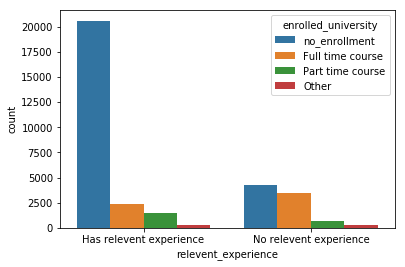

In [69]:
sns.countplot(all_data['relevent_experience'], hue=all_data['enrolled_university'])
plt.show()

has relevent experience


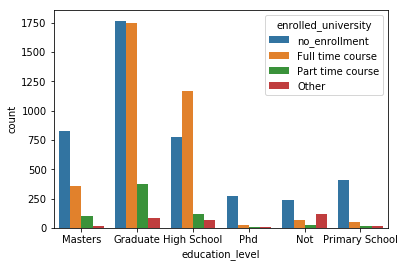

In [70]:
print('has relevent experience')
sns.countplot(all_data[all_data['relevent_experience'] == 'No relevent experience']['education_level'], hue=all_data[all_data['relevent_experience'] == 'No relevent experience']['enrolled_university'])
plt.show()

No relevent experience


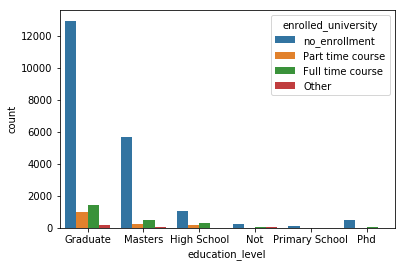

In [71]:
print('No relevent experience')
sns.countplot(all_data[all_data['relevent_experience'] == 'Has relevent experience']['education_level'], hue=all_data[all_data['relevent_experience'] == 'Has relevent experience']['enrolled_university'])
plt.show()

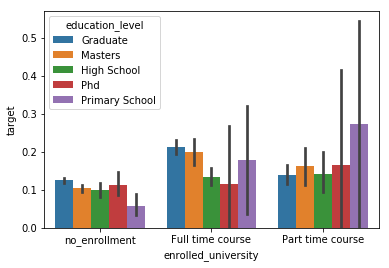

In [72]:
sns.barplot(train_df['enrolled_university'], train_df['target'], hue=train_df['education_level'])

In [73]:
# enrollee which are not_enrolled and have education level of primary school are most likely to not change their job

####  Filling missing values of gender

In [74]:
# fill it with 'Male'

In [75]:
all_data.loc[all_data['gender'].isnull(), 'gender'] = 'Male'

In [76]:
all_data.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

####  prepareing data for model

In [77]:
all_data.head()

enrollee_id      city  city_development_index gender  \
0        23798  city_149                   0.689   Male   
1        29166   city_83                   0.923   Male   
2           46   city_16                   0.910   Male   
3        18527   city_64                   0.666   Male   
4        21751  city_100                   0.887   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4   No relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM          3        50-99         Pvt Ltd            1   
1             STEM         14        50-99  Funded Startup            1   
2             STEM          6    1000-4999   Public Sector            2   
3             STEM         14        50-99         Pvt Ltd            1   
4             STEM          8   unemployed      unemployed            2   

   training_hours  target  
0             106     0.0  
1              69     0.0  
2               4     0.0  
3              26     0.0  
4              88     1.0

In [78]:
all_data['city'] = all_data['city'].apply(lambda x: int(x.split('_')[1]))

all_data.loc[all_data['enrolled_university'] == 'Other', 'enrolled_university'] = 0
all_data.loc[all_data['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = 1
all_data.loc[all_data['enrolled_university'] == 'Part time course', 'enrolled_university'] = 2
all_data.loc[all_data['enrolled_university'] == 'Full time course', 'enrolled_university'] = 3
all_data['enrolled_university'] = all_data['enrolled_university'].astype('int')

all_data.loc[all_data['education_level'] == 'Not', 'education_level'] = 0
all_data.loc[all_data['education_level'] == 'Primary School', 'education_level'] = 1
all_data.loc[all_data['education_level'] == 'High School', 'education_level'] = 2
all_data.loc[all_data['education_level'] == 'Graduate', 'education_level'] = 3
all_data.loc[all_data['education_level'] == 'Masters', 'education_level'] = 4
all_data.loc[all_data['education_level'] == 'Phd', 'education_level'] = 5
all_data['education_level'] = all_data['education_level'].astype('int')

all_data.loc[all_data['experience'] == '<1', 'experience'] = 0
all_data.loc[all_data['experience'] == '>20', 'experience'] = 21
all_data['experience'] = all_data['experience'].astype('int')

all_data.loc[all_data['company_size'] == 'unemployed', 'company_size'] = 0
all_data.loc[all_data['company_size'] == '<10', 'company_size'] = 1
all_data.loc[all_data['company_size'] == '<10', 'company_size'] = 2
all_data.loc[all_data['company_size'] == '10/49', 'company_size'] = 3
all_data.loc[all_data['company_size'] == '50-99', 'company_size'] = 4
all_data.loc[all_data['company_size'] == '100-500', 'company_size'] = 5
all_data.loc[all_data['company_size'] == '500-999', 'company_size'] = 6
all_data.loc[all_data['company_size'] == '1000-4999', 'company_size'] = 7
all_data.loc[all_data['company_size'] == '5000-9999', 'company_size'] = 8
all_data.loc[all_data['company_size'] == '10000+', 'company_size'] = 9
all_data['company_size'] = all_data['company_size'].astype('int')

all_data.loc[all_data['last_new_job'] == 'never', 'last_new_job'] = 0
all_data.loc[all_data['last_new_job'] == '>4', 'last_new_job'] = 5
all_data['last_new_job'] = all_data['last_new_job'].astype('int')

all_data.loc[all_data['gender'] == 'Male', 'gender'] = 0
all_data.loc[all_data['gender'] == 'Female', 'gender'] = 1
all_data.loc[all_data['gender'] == 'Other', 'gender'] = 2
all_data['gender'] = all_data['gender'].astype('int')

all_data.loc[all_data['relevent_experience'] == 'Has relevent experience', 'relevent_experience'] = 1
all_data.loc[all_data['relevent_experience'] == 'No relevent experience', 'relevent_experience'] = 0
all_data['relevent_experience'] = all_data['relevent_experience'].astype('int')

all_data.loc[all_data['major_discipline'] == 'Not', 'major_discipline'] = 0
all_data.loc[all_data['major_discipline'] == 'can not have', 'major_discipline'] = 1
all_data.loc[all_data['major_discipline'] == 'No Major', 'major_discipline'] = 2
all_data.loc[all_data['major_discipline'] == 'STEM', 'major_discipline'] = 3
all_data.loc[all_data['major_discipline'] == 'Other', 'major_discipline'] = 4
all_data.loc[all_data['major_discipline'] == 'Business Degree', 'major_discipline'] = 5
all_data.loc[all_data['major_discipline'] == 'Arts', 'major_discipline'] = 6
all_data.loc[all_data['major_discipline'] == 'Humanities', 'major_discipline'] = 7
all_data['major_discipline'] = all_data['major_discipline'].astype('int')

all_data.loc[all_data['company_type'] == 'unemployed', 'company_type'] = 0
all_data.loc[all_data['company_type'] == 'Pvt Ltd', 'company_type'] = 0
all_data.loc[all_data['company_type'] == 'Funded Startup', 'company_type'] = 1
all_data.loc[all_data['company_type'] == 'Public Sector', 'company_type'] = 2
all_data.loc[all_data['company_type'] == 'Early Stage Startup', 'company_type'] = 3
all_data.loc[all_data['company_type'] == 'NGO', 'company_type'] = 4
all_data.loc[all_data['company_type'] == 'Other', 'company_type'] = 5
all_data['company_type'] = all_data['company_type'].astype('int')

In [79]:
all_data.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int32
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
training_hours              int64
target                    float64
dtype: object

In [80]:
train_df = all_data[:train_df.shape[0]]
test_df = all_data[train_df.shape[0]:]

In [137]:
test_df.drop(['target'], 1, inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
train_df.head()

enrollee_id  city  city_development_index  gender  relevent_experience  \
0        23798   149                   0.689       0                    1   
1        29166    83                   0.923       0                    1   
2           46    16                   0.910       0                    1   
3        18527    64                   0.666       0                    1   
4        21751   100                   0.887       0                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    1                3                 3           3   
1                    1                3                 3          14   
2                    1                3                 3           6   
3                    1                3                 3          14   
4                    1                4                 3           8   

   company_size  company_type  last_new_job  training_hours  target  
0             4             0             1             106     0.0  
1             4             1             1              69     0.0  
2             7             2             2               4     0.0  
3             4             0             1              26     0.0  
4             0             0             2              88     1.0

## Catboost model
public LB - 0.6805637583

In [89]:
# features for model
features = [i for i in train_df.columns if i not in ['enrollee_id', 'target']]

In [90]:
features

['city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [91]:
# categorical feature indexes for features. used in catboost model for specifying categorical variables.
cat_ind = [0, 2, 3, 4, 6, 9]
cat_ind

[0, 2, 3, 4, 6, 9]

In [34]:
# Because of the data is imbalanced we have used class_weights. class 0: 1, class 1: 5 
cat_clf = cb.CatBoostClassifier(eval_metric="AUC",
                                 od_type='Iter',
                                 od_wait=50,
                                 #logging_level='Silent',
                                 # class_weights = [1, 5],
                                 random_seed= 10048918565048
                                 )

In [35]:
cat_clf.fit(train_df[features], train_df['target'], cat_features=cat_ind)

0:	learn: 0.6718617	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.6528846	total: 79ms	remaining: 39.4s
2:	learn: 0.6345744	total: 138ms	remaining: 45.8s
3:	learn: 0.6176034	total: 174ms	remaining: 43.3s
4:	learn: 0.6015054	total: 195ms	remaining: 38.8s
5:	learn: 0.5867496	total: 219ms	remaining: 36.3s
6:	learn: 0.5726828	total: 255ms	remaining: 36.2s
7:	learn: 0.5598981	total: 292ms	remaining: 36.2s
8:	learn: 0.5477771	total: 356ms	remaining: 39.1s
9:	learn: 0.5370919	total: 374ms	remaining: 37s
10:	learn: 0.5268155	total: 428ms	remaining: 38.5s
11:	learn: 0.5169175	total: 484ms	remaining: 39.9s
12:	learn: 0.5075246	total: 536ms	remaining: 40.7s
13:	learn: 0.4990376	total: 569ms	remaining: 40.1s
14:	learn: 0.4915892	total: 586ms	remaining: 38.5s
15:	learn: 0.4846473	total: 604ms	remaining: 37.1s
16:	learn: 0.4776305	total: 673ms	remaining: 38.9s
17:	learn: 0.4712617	total: 720ms	remaining: 39.3s
18:	learn: 0.4656416	total: 759ms	remaining: 39.2s
19:	learn: 0.4597498	total: 840ms	remaining

In [36]:
# accurcy score on train data
cat_clf.score(train_df[features], train_df['target'])

0.8694918023857509

In [28]:
# roc auc score on train dataset
roc_auc_score(train_df['target'], cat_clf.predict_proba(train_df[features])[:,1])

0.717203037271011

In [29]:
# confusion matrix on train dataset
confusion_matrix(train_df['target'], cat_clf.predict(train_df[features]))

array([[15926,     8],
       [ 2388,    37]], dtype=int64)

In [30]:
# random seed used by model
cat_clf.random_seed_

10048918565048

In [31]:
# number of trees
cat_clf.tree_count_

1000

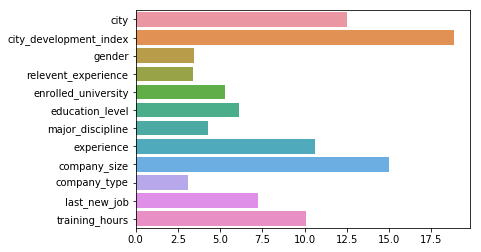

In [32]:
#plot feature importance for each column
sns.barplot(cat_clf.feature_importances_, features)

In [33]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = cat_clf.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/cat_one.csv', index=False)

In [205]:
# for test dataset predictions
(sub['target'] > 0.5).astype('int').value_counts()

0    11400
1     3621
Name: target, dtype: int64

### XGBoost model
public lb : 0.682957734554961 roc auc

In [118]:
def xgb_bi_cla_modelfit(model, train_data, train_label, predictors, eval_metric, useTrainCV=True, stratifiedCV = True, cv_folds=10, early_stopping_rounds=100):
    
    if useTrainCV:
        xgb_param = model.get_xgb_params()
        params = {
            'objective' : xgb_param['objective'],
            #'num_class' : 2,
            'base_score' : xgb_param['base_score'],
            'colsample_bylevel' : xgb_param['colsample_bylevel'],
            'colsample_bytree' : xgb_param['colsample_bytree'],
            'gamma' : xgb_param['gamma'],
            'eta' : xgb_param['learning_rate'],
            'max_delta_step' : xgb_param['max_delta_step'],
            'max_depth' : xgb_param['max_depth'],
            'min_child_weight' : xgb_param['min_child_weight'],
            'alpha' : xgb_param['reg_alpha'],
            'lambda': xgb_param['reg_lambda'],
            'scale_pos_weight' : xgb_param['scale_pos_weight'],
            'subsample' : xgb_param['subsample'],     
        }
        
        dtrain = xgb.DMatrix(data=train_data[predictors], label=train_label)
        cvresult = xgb.cv(params , dtrain, num_boost_round=model.get_params()['n_estimators'], stratified=stratifiedCV, nfold=cv_folds, metrics=eval_metric, early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
        # print(cvresult)
        print("########### n_estimators = %f" % cvresult.shape[0])
    
    # Fit the algorithm on the data
    model.fit(train_data[predictors], train_label,eval_metric=eval_metric)
        
    # Predict training set:
    train_predictions = model.predict(train_data[predictors])
    train_predprob = model.predict_proba(train_data[predictors])[:,1]
    
    
    # Print model report:
    print("\n###### Model Report Train data ######")
    roc_auc_t = roc_auc_score(train_label, train_predprob)
    print("roc auc score (Train): %f" % roc_auc_t)
    print("confuson matrix (Train): ")
    conf_mat_train = confusion_matrix(train_label, train_predictions)
    print(conf_mat_train)
    
    feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
    ax_f = feat_imp.plot(kind='bar', title='Feature Importances')
    plt.plot()
    return model

In [119]:
clf1 = xgb.XGBClassifier(objective ='reg:logistic',learning_rate=0.01, max_depth=6, n_estimators=1500, subsample=0.8, colsample_bytree=0.8, gamma=0, min_child_weight= 1, reg_alpha=0.1, scale_pos_weight=6)

########### n_estimators = 77.000000


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



###### Model Report Train data ######
roc auc score (Train): 0.731569
confuson matrix (Train): 
[[12370  3564]
 [ 1043  1382]]


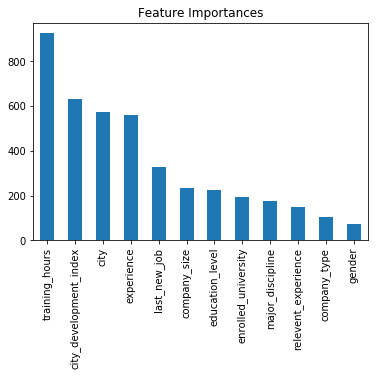

In [120]:
clf1 = xgb_bi_cla_modelfit(clf1, train_df, train_df['target'], features, 'auc')

In [121]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = clf1.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/xgb_two.csv', index=False)

###  More catboost model with cross validation

### # # # # # # # # # # # # # # #  ## # 

In [39]:
def hyperopt_objective(params):
    model = cb.CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [1, 6],
        od_type= 'Iter',
        od_wait= 100,
        iterations = 1500,
        depth = params['depth']
    )
    
    cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind), model.get_params(), stratified=True, nfold=5)
    best_accuracy = np.max(cv_data['test-AUC-mean'])
    
    return (1 - best_accuracy) # as hyperopt minimises

In [41]:
params_space = {
    'l2_leaf_reg': hpo.hp.choice('l2_leaf_reg', [2, 4, 6]),
    'learning_rate': hpo.hp.choice('learning_rate', [0.1, 0.03, 0.15, 0.04]),
    'depth': hpo.hp.choice('depth', [3, 4, 6])
}

trials = hpo.Trials()

best = hpo.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hpo.tpe.suggest,
    max_evals=50,
    trials=trials,
)

print(best)

0:	learn: 0.6151125	test: 0.6091374	best: 0.6091374 (0)	total: 140ms	remaining: 3m 30s
1:	learn: 0.6359941	test: 0.6307568	best: 0.6307568 (1)	total: 228ms	remaining: 2m 50s
2:	learn: 0.6377940	test: 0.6353373	best: 0.6353373 (2)	total: 337ms	remaining: 2m 48s
3:	learn: 0.6432102	test: 0.6396772	best: 0.6396772 (3)	total: 476ms	remaining: 2m 57s
4:	learn: 0.6452669	test: 0.6407744	best: 0.6407744 (4)	total: 589ms	remaining: 2m 56s
5:	learn: 0.6473444	test: 0.6445903	best: 0.6445903 (5)	total: 694ms	remaining: 2m 52s
6:	learn: 0.6477542	test: 0.6447681	best: 0.6447681 (6)	total: 829ms	remaining: 2m 56s
7:	learn: 0.6511105	test: 0.6481715	best: 0.6481715 (7)	total: 944ms	remaining: 2m 56s
8:	learn: 0.6514238	test: 0.6473248	best: 0.6481715 (7)	total: 1.07s	remaining: 2m 57s
9:	learn: 0.6523565	test: 0.6492286	best: 0.6492286 (9)	total: 1.22s	remaining: 3m 1s
10:	learn: 0.6523563	test: 0.6490939	best: 0.6492286 (9)	total: 1.33s	remaining: 3m
11:	learn: 0.6535515	test: 0.6488963	best: 0.64

In [ ]:
# interations = 260
# depth = 6
# learning_rate = 0.03
# l2_leaf_reg = 2
# eval_metric='AUC',
# random_seed=21072018,
# class_weights = [1, 6]
# best test auc score : 0.6603142
# learn: 0.7159219	test: 0.6603142	best: 0.6603142 (260)

### # # # # # # # #  ## #  # # # # #  # # # # #

In [42]:
cat_clf_2 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.033,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [1, 6],
        od_type= 'Iter',
        od_wait= 200,
        iterations = 1500,
        depth = 8
    )

In [43]:
cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind), cat_clf_2.get_params(), stratified=True, nfold=5)
best_accuracy = np.max(cv_data['test-AUC-mean'])

0:	learn: 0.6153663	test: 0.6093088	best: 0.6093088 (0)	total: 188ms	remaining: 4m 41s
1:	learn: 0.6486470	test: 0.6367952	best: 0.6367952 (1)	total: 464ms	remaining: 5m 47s
2:	learn: 0.6500207	test: 0.6372532	best: 0.6372532 (2)	total: 674ms	remaining: 5m 36s
3:	learn: 0.6514524	test: 0.6417064	best: 0.6417064 (3)	total: 865ms	remaining: 5m 23s
4:	learn: 0.6519456	test: 0.6430457	best: 0.6430457 (4)	total: 1.13s	remaining: 5m 38s
5:	learn: 0.6578143	test: 0.6445105	best: 0.6445105 (5)	total: 1.38s	remaining: 5m 43s
6:	learn: 0.6584392	test: 0.6449530	best: 0.6449530 (6)	total: 1.6s	remaining: 5m 40s
7:	learn: 0.6592960	test: 0.6456099	best: 0.6456099 (7)	total: 1.82s	remaining: 5m 39s
8:	learn: 0.6609411	test: 0.6468977	best: 0.6468977 (8)	total: 2.12s	remaining: 5m 51s
9:	learn: 0.6618630	test: 0.6468879	best: 0.6468977 (8)	total: 2.33s	remaining: 5m 46s
10:	learn: 0.6610941	test: 0.6472725	best: 0.6472725 (10)	total: 2.49s	remaining: 5m 37s
11:	learn: 0.6614553	test: 0.6476787	best:

In [46]:
np.std(cv_data['test-AUC-mean'])

0.0036438882246648736

In [44]:
# learn: 0.7201670	test: 0.6611802	best: 0.6611802 (371) Better than previous
# l2_leaf_reg=3,
# learning_rate=0.033,
# eval_metric='AUC',
# random_seed=21072018,
# class_weights = [1, 6],
# od_type= 'Iter',
# od_wait= 200,
# iterations = 371,
# depth = 8

### # # # # #  # # # #  # #  # # # # # #  # # # # # # #

####  Public lb 0.6832507585 roc auc

In [258]:
cat_clf_3 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
    )

In [49]:
cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind), cat_clf_3.get_params(), stratified=True, nfold=10)
best_accuracy = np.max(cv_data['test-AUC-mean'])

0:	learn: 0.6416238	test: 0.6307701	best: 0.6307701 (0)	total: 311ms	remaining: 7m 46s
1:	learn: 0.6463399	test: 0.6360908	best: 0.6360908 (1)	total: 477ms	remaining: 5m 57s
2:	learn: 0.6496915	test: 0.6405828	best: 0.6405828 (2)	total: 677ms	remaining: 5m 37s
3:	learn: 0.6560961	test: 0.6458935	best: 0.6458935 (3)	total: 913ms	remaining: 5m 41s
4:	learn: 0.6592434	test: 0.6467108	best: 0.6467108 (4)	total: 1.21s	remaining: 6m 1s
5:	learn: 0.6595118	test: 0.6461051	best: 0.6467108 (4)	total: 1.37s	remaining: 5m 42s
6:	learn: 0.6589602	test: 0.6466326	best: 0.6467108 (4)	total: 1.56s	remaining: 5m 32s
7:	learn: 0.6593488	test: 0.6458753	best: 0.6467108 (4)	total: 1.81s	remaining: 5m 37s
8:	learn: 0.6584208	test: 0.6455454	best: 0.6467108 (4)	total: 1.94s	remaining: 5m 22s
9:	learn: 0.6584603	test: 0.6459659	best: 0.6467108 (4)	total: 2.05s	remaining: 5m 6s
10:	learn: 0.6598246	test: 0.6470473	best: 0.6470473 (10)	total: 2.28s	remaining: 5m 9s
11:	learn: 0.6595267	test: 0.6471307	best: 0

In [50]:
# learn: 0.7236804	test: 0.6619536	best: 0.6619536 (751)  ## best lb and second best CV
'''
        l2_leaf_reg=3,
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
        boosting_type = 'Ordered' 
'''

"\n        l2_leaf_reg=3,\n        learning_rate=0.01,\n        eval_metric='AUC',\n        random_seed=21072018,\n        class_weights = [0.5, 3],\n        iterations = 1500,\n        depth = 8,\n        boosting_type = 'Ordered' \n"

In [259]:
cat_clf_3.set_params(**{'iterations' : 752})
cat_clf_3.get_params()

{'class_weights': [0.5, 3],
 'depth': 8,
 'eval_metric': 'AUC',
 'iterations': 752,
 'l2_leaf_reg': 3,
 'learning_rate': 0.01,
 'loss_function': 'Logloss',
 'random_seed': 21072018}

In [261]:
cat_clf_3.fit(train_df[features], train_df['target'], cat_features=cat_ind)

0:	learn: 0.6191413	total: 70.8ms	remaining: 53.2s
1:	learn: 0.6324221	total: 125ms	remaining: 46.9s
2:	learn: 0.6452534	total: 255ms	remaining: 1m 3s
3:	learn: 0.6580357	total: 407ms	remaining: 1m 16s
4:	learn: 0.6573006	total: 496ms	remaining: 1m 14s
5:	learn: 0.6574338	total: 576ms	remaining: 1m 11s
6:	learn: 0.6626365	total: 718ms	remaining: 1m 16s
7:	learn: 0.6633972	total: 863ms	remaining: 1m 20s
8:	learn: 0.6643817	total: 1.02s	remaining: 1m 24s
9:	learn: 0.6643375	total: 1.16s	remaining: 1m 25s
10:	learn: 0.6645271	total: 1.27s	remaining: 1m 25s
11:	learn: 0.6639378	total: 1.32s	remaining: 1m 21s
12:	learn: 0.6636367	total: 1.37s	remaining: 1m 17s
13:	learn: 0.6636015	total: 1.45s	remaining: 1m 16s
14:	learn: 0.6632610	total: 1.52s	remaining: 1m 14s
15:	learn: 0.6634060	total: 1.61s	remaining: 1m 13s
16:	learn: 0.6630462	total: 1.67s	remaining: 1m 12s
17:	learn: 0.6628124	total: 1.77s	remaining: 1m 12s
18:	learn: 0.6628150	total: 1.89s	remaining: 1m 12s
19:	learn: 0.6624473	tot

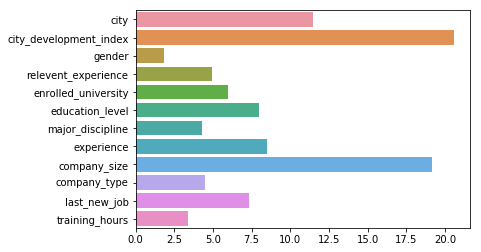

In [262]:
sns.barplot(cat_clf_3.feature_importances_, features )

In [59]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = cat_clf_3.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/cat_two.csv', index=False)

### # # # # # # # # # # # # # # # # # # #  # # # # # # # # # # # # # # # #  ## 

In [51]:
cat_clf_4 = cb.CatBoostClassifier(
        l2_leaf_reg=2,`
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 6,
        boosting_type = 'Ordered' 
    )

In [52]:
cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind), cat_clf_4.get_params(), stratified=True, nfold=10)
best_accuracy = np.max(cv_data['test-AUC-mean'])

0:	learn: 0.6372962	test: 0.6316309	best: 0.6316309 (0)	total: 212ms	remaining: 5m 17s
1:	learn: 0.6459571	test: 0.6379632	best: 0.6379632 (1)	total: 396ms	remaining: 4m 56s
2:	learn: 0.6564875	test: 0.6402670	best: 0.6402670 (2)	total: 643ms	remaining: 5m 20s
3:	learn: 0.6568043	test: 0.6431638	best: 0.6431638 (3)	total: 798ms	remaining: 4m 58s
4:	learn: 0.6578223	test: 0.6437776	best: 0.6437776 (4)	total: 989ms	remaining: 4m 55s
5:	learn: 0.6580328	test: 0.6447697	best: 0.6447697 (5)	total: 1.19s	remaining: 4m 57s
6:	learn: 0.6586232	test: 0.6465153	best: 0.6465153 (6)	total: 1.43s	remaining: 5m 4s
7:	learn: 0.6582791	test: 0.6466241	best: 0.6466241 (7)	total: 1.64s	remaining: 5m 6s
8:	learn: 0.6587503	test: 0.6460302	best: 0.6466241 (7)	total: 1.9s	remaining: 5m 15s
9:	learn: 0.6601946	test: 0.6476166	best: 0.6476166 (9)	total: 2.15s	remaining: 5m 19s
10:	learn: 0.6608087	test: 0.6474873	best: 0.6476166 (9)	total: 2.43s	remaining: 5m 28s
11:	learn: 0.6609068	test: 0.6476858	best: 0.

###  #  # # # # # #  # # # # # #  # # # # #  # # # # # #  # # # # #  # # # #

In [62]:
cat_clf_5 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.005,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
    )
# learn: 0.7180769	test: 0.6618602	best: 0.6618602 (1042)

In [63]:
cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind), cat_clf_5.get_params(), stratified=True, nfold=10)

0:	learn: 0.6416238	test: 0.6307701	best: 0.6307701 (0)	total: 327ms	remaining: 8m 10s
1:	learn: 0.6463396	test: 0.6360908	best: 0.6360908 (1)	total: 478ms	remaining: 5m 58s
2:	learn: 0.6496900	test: 0.6405855	best: 0.6405855 (2)	total: 690ms	remaining: 5m 44s
3:	learn: 0.6560714	test: 0.6459071	best: 0.6459071 (3)	total: 960ms	remaining: 5m 59s
4:	learn: 0.6575967	test: 0.6463445	best: 0.6463445 (4)	total: 1.26s	remaining: 6m 18s
5:	learn: 0.6574976	test: 0.6459714	best: 0.6463445 (4)	total: 1.49s	remaining: 6m 12s
6:	learn: 0.6577787	test: 0.6460836	best: 0.6463445 (4)	total: 1.74s	remaining: 6m 10s
7:	learn: 0.6582369	test: 0.6463231	best: 0.6463445 (4)	total: 1.98s	remaining: 6m 9s
8:	learn: 0.6575793	test: 0.6461048	best: 0.6463445 (4)	total: 2.12s	remaining: 5m 51s
9:	learn: 0.6577314	test: 0.6465920	best: 0.6465920 (9)	total: 2.28s	remaining: 5m 40s
10:	learn: 0.6591005	test: 0.6477380	best: 0.6477380 (10)	total: 2.57s	remaining: 5m 47s
11:	learn: 0.6587710	test: 0.6476842	best:

###  # # # # # #  ##  # # # # # #  # # # # # # #
public LB - 0.681945355274114 roc auc.<br>
surprisingly CV score is high for train and test both but when model is trained on entire train data its train score is low, and public lb too.

In [68]:
cat_ind_all = [0,2,3,4,5,6,7,8,9,10,11]

In [69]:
cat_clf_6 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
    )
# learn: 0.7378393	test: 0.6635607	best: 0.6635607 (1183) // BEST CV but not LB 

In [70]:
cv_data = cb.cv(cb.Pool(train_df[features], train_df['target'], cat_features=cat_ind_all), cat_clf_6.get_params(), stratified=True, nfold=10)

0:	learn: 0.6453567	test: 0.6356878	best: 0.6356878 (0)	total: 397ms	remaining: 9m 55s
1:	learn: 0.6562374	test: 0.6468003	best: 0.6468003 (1)	total: 665ms	remaining: 8m 17s
2:	learn: 0.6591723	test: 0.6477205	best: 0.6477205 (2)	total: 1.04s	remaining: 8m 41s
3:	learn: 0.6611228	test: 0.6482770	best: 0.6482770 (3)	total: 1.46s	remaining: 9m 5s
4:	learn: 0.6621605	test: 0.6514910	best: 0.6514910 (4)	total: 1.74s	remaining: 8m 39s
5:	learn: 0.6630846	test: 0.6525075	best: 0.6525075 (5)	total: 2.23s	remaining: 9m 16s
6:	learn: 0.6647023	test: 0.6528981	best: 0.6528981 (6)	total: 2.63s	remaining: 9m 22s
7:	learn: 0.6645469	test: 0.6530617	best: 0.6530617 (7)	total: 2.92s	remaining: 9m 4s
8:	learn: 0.6659714	test: 0.6532860	best: 0.6532860 (8)	total: 3.29s	remaining: 9m 4s
9:	learn: 0.6668045	test: 0.6540730	best: 0.6540730 (9)	total: 3.63s	remaining: 9m 1s
10:	learn: 0.6670845	test: 0.6542518	best: 0.6542518 (10)	total: 3.87s	remaining: 8m 43s
11:	learn: 0.6671352	test: 0.6543523	best: 0.

In [71]:
cat_clf_6.set_params(**{'iterations': 1185})
cat_clf_6.get_params()

{'class_weights': [0.5, 3],
 'depth': 8,
 'eval_metric': 'AUC',
 'iterations': 1185,
 'l2_leaf_reg': 3,
 'learning_rate': 0.01,
 'loss_function': 'Logloss',
 'random_seed': 21072018}

In [72]:
cat_clf_6.fit(train_df[features], train_df['target'], cat_features=cat_ind_all)

0:	learn: 0.6391389	total: 184ms	remaining: 3m 37s
1:	learn: 0.6456141	total: 259ms	remaining: 2m 33s
2:	learn: 0.6522674	total: 446ms	remaining: 2m 55s
3:	learn: 0.6538166	total: 533ms	remaining: 2m 37s
4:	learn: 0.6539274	total: 623ms	remaining: 2m 26s
5:	learn: 0.6568543	total: 834ms	remaining: 2m 43s
6:	learn: 0.6566326	total: 955ms	remaining: 2m 40s
7:	learn: 0.6583242	total: 1.07s	remaining: 2m 37s
8:	learn: 0.6590842	total: 1.19s	remaining: 2m 35s
9:	learn: 0.6591334	total: 1.34s	remaining: 2m 37s
10:	learn: 0.6590267	total: 1.43s	remaining: 2m 32s
11:	learn: 0.6620770	total: 1.67s	remaining: 2m 42s
12:	learn: 0.6619980	total: 1.88s	remaining: 2m 49s
13:	learn: 0.6619162	total: 2.04s	remaining: 2m 50s
14:	learn: 0.6614498	total: 2.12s	remaining: 2m 45s
15:	learn: 0.6612385	total: 2.19s	remaining: 2m 40s
16:	learn: 0.6625501	total: 2.37s	remaining: 2m 42s
17:	learn: 0.6627866	total: 2.62s	remaining: 2m 49s
18:	learn: 0.6627814	total: 2.82s	remaining: 2m 53s
19:	learn: 0.6626545	t

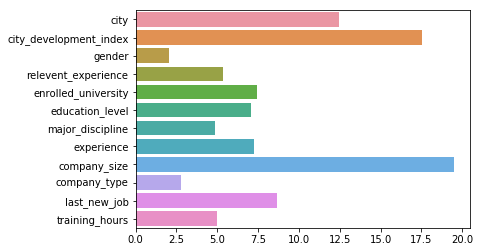

In [73]:
sns.barplot(cat_clf_6.feature_importances_, features)

In [74]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = cat_clf_6.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/cat_three.csv', index=False)

### # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

###  Random forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

####  RF base
public lb : 0.60 roc auc

In [76]:
rf_clf = RandomForestClassifier()

In [77]:
rf_clf.fit(train_df[features], train_df['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = rf_clf.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/rf_base.csv', index=False)

###  # # # #  # # # # #  # # # # # 

In [83]:
def roc_auc_scorer(y_true, y_pred):
    return roc_auc_score(y_true, y_pred[:, 1])

In [84]:
roc_scorer = make_scorer(roc_auc_scorer, needs_proba=True)

###  RF gridsearchcv 
public lb : 0.680971894218243 roc auc

In [ ]:
rf_clf_3 = RandomForestClassifier(n_jobs = -1, class_weight={0: 0.5, 1: 3}, random_state = 21072018, max_depth= 6, max_features= 0.5, n_estimators=800)
rf_fit_3 = GridSearchCV(estimator=rf_clf_1, param_grid=param_grid, scoring = roc_scorer)

In [109]:
rf_clf_1 = RandomForestClassifier(n_jobs = -1, class_weight={0: 0.5, 1: 3}, random_state = 21072018)

In [110]:
param_grid = {
    'n_estimators': [500, 800],
    'max_features': [.5,.7],
    'max_depth':[6, 8]
}

In [111]:
rf_fit_1 = GridSearchCV(estimator=rf_clf_1, param_grid=param_grid, scoring = roc_scorer)

In [112]:
rf_fit_1.fit(train_df[features], train_df['target'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 3},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False,
            random_state=21072018, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [0.5, 0.7], 'n_estimators': [500, 800], 'max_depth': [6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_scorer, needs_proba=True), verbose=0)

In [113]:
rf_fit_1.best_params_

{'max_depth': 6, 'max_features': 0.5, 'n_estimators': 800}

In [114]:
means = rf_fit_1.cv_results_['mean_test_score']
stds = rf_fit_1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rf_fit_1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.667 (+/-0.012) for {'max_features': 0.5, 'n_estimators': 500, 'max_depth': 6}
0.667 (+/-0.012) for {'max_features': 0.5, 'n_estimators': 800, 'max_depth': 6}
0.666 (+/-0.012) for {'max_features': 0.7, 'n_estimators': 500, 'max_depth': 6}
0.666 (+/-0.012) for {'max_features': 0.7, 'n_estimators': 800, 'max_depth': 6}
0.658 (+/-0.010) for {'max_features': 0.5, 'n_estimators': 500, 'max_depth': 8}
0.658 (+/-0.010) for {'max_features': 0.5, 'n_estimators': 800, 'max_depth': 8}
0.655 (+/-0.008) for {'max_features': 0.7, 'n_estimators': 500, 'max_depth': 8}
0.656 (+/-0.009) for {'max_features': 0.7, 'n_estimators': 800, 'max_depth': 8}


In [115]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = rf_fit_1.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/rf_one.csv', index=False)

### # # # # # # # # # #  # # # # # # # # # # # # # 

In [125]:
rf_clf_2 = RandomForestClassifier(n_jobs = -1, class_weight={0: 0.5, 1: 3}, random_state = 21072018)

In [126]:
param_grid_2 = {
    'n_estimators': [500, 800, 1000],
    'max_features': [.4, .5],
    'max_depth':[6, 7]
}

In [127]:
rf_fit_2 = GridSearchCV(estimator=rf_clf_2, param_grid=param_grid_2, scoring = roc_scorer)

In [128]:
rf_fit_2.fit(train_df[features], train_df['target'])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 3},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False,
            random_state=21072018, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [0.4, 0.5], 'n_estimators': [500, 800, 1000], 'max_depth': [6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_scorer, needs_proba=True), verbose=0)

In [129]:
rf_fit_2.best_params_

{'max_depth': 6, 'max_features': 0.5, 'n_estimators': 800}

In [ ]:
# rf_fit_1 is final RF model

###  Logistic regression
public LB : 0.6616762888187182. roc auc

In [153]:
# Preparing data for linear models

In [139]:
cat_col_name = [i for i in test_df.columns if i not in ['enrollee_id', 'city', 'city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours']]
cat_col_name

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type']

In [145]:
train_df_enc = train_df[cat_col_name].astype('O')

In [147]:
for col in [i for i in train_df.columns if i not in cat_col_name]:
    train_df_enc[col] = train_df[col]

In [151]:
test_df_enc = test_df[cat_col_name].astype('O')
for col in [i for i in test_df.columns if i not in cat_col_name]:
    test_df_enc[col] = test_df[col]

In [162]:
train_df_enc = pd.get_dummies(train_df_enc)

In [164]:
test_df_enc = pd.get_dummies(test_df_enc)

In [163]:
train_df_enc.head()

enrollee_id  city  city_development_index  experience  company_size  \
0        23798   149                   0.689           3             4   
1        29166    83                   0.923          14             4   
2           46    16                   0.910           6             7   
3        18527    64                   0.666          14             4   
4        21751   100                   0.887           8             0   

   last_new_job  training_hours  target  gender_0  gender_1       ...        \
0             1             106     0.0         1         0       ...         
1             1              69     0.0         1         0       ...         
2             2               4     0.0         1         0       ...         
3             1              26     0.0         1         0       ...         
4             2              88     1.0         1         0       ...         

   major_discipline_4  major_discipline_5  major_discipline_6  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   major_discipline_7  company_type_0  company_type_1  company_type_2  \
0                   0               1               0               0   
1                   0               0               1               0   
2                   0               0               0               1   
3                   0               1               0               0   
4                   0               1               0               0   

   company_type_3  company_type_4  company_type_5  
0               0               0               0  
1               0               0               0  
2               0               0               0  
3               0               0               0  
4               0               0               0  

[5 rows x 37 columns]

In [165]:
test_df_enc.head()

enrollee_id  city  city_development_index  experience  company_size  \
18359        16548    33                   0.448           0             7   
18360        12036    28                   0.939          21             4   
18361        11061   103                   0.920           3             0   
18362         5032   104                   0.924          21             4   
18363        17599    77                   0.830           6             4   

       last_new_job  training_hours  gender_0  gender_1  gender_2  \
18359             1              15         1         0         0   
18360             1              94         1         0         0   
18361             1              17         1         0         0   
18362             2              76         1         0         0   
18363             2              65         1         0         0   

            ...        major_discipline_4  major_discipline_5  \
18359       ...                         0                   0   
18360       ...                         0                   0   
18361       ...                         0                   0   
18362       ...                         0                   0   
18363       ...                         0                   0   

       major_discipline_6  major_discipline_7  company_type_0  company_type_1  \
18359                   0                   0               0               0   
18360                   0                   0               1               0   
18361                   0                   0               1               0   
18362                   0                   0               1               0   
18363                   0                   0               1               0   

       company_type_2  company_type_3  company_type_4  company_type_5  
18359               1               0               0               0  
18360               0               0               0               0  
18361               0               0               0               0  
18362               0               0               0               0  
18363               0               0               0               0  

[5 rows x 36 columns]

In [166]:
features_lr = [i for i in test_df_enc.columns if i not in ['enrollee_id']]

In [155]:
# #############################################################################

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lr_clf_1 = LogisticRegression(class_weight= {0: 0.5, 1: 3}, random_state= 21072018)

In [183]:
param_grid_lr_1 = {
    'C': [0.01, 0.1, 0.5, 1, 3, 5],
    'max_iter': [200, 100],
}

In [184]:
lr_fit_1 = GridSearchCV(estimator=lr_clf_1, param_grid=param_grid_lr_1, scoring = roc_scorer, cv=5)

In [185]:
lr_fit_1.fit(train_df_enc[features_lr], train_df_enc['target'].astype('int'))

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 3}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=21072018,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [200, 100], 'C': [0.01, 0.1, 0.5, 1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_scorer, needs_proba=True), verbose=0)

In [186]:
lr_fit_1.best_params_

{'C': 5, 'max_iter': 200}

In [187]:
means = lr_fit_1.cv_results_['mean_test_score']
stds = lr_fit_1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_fit_1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.635 (+/-0.039) for {'max_iter': 200, 'C': 0.01}
0.635 (+/-0.039) for {'max_iter': 100, 'C': 0.01}
0.649 (+/-0.035) for {'max_iter': 200, 'C': 0.1}
0.649 (+/-0.035) for {'max_iter': 100, 'C': 0.1}
0.650 (+/-0.034) for {'max_iter': 200, 'C': 0.5}
0.650 (+/-0.034) for {'max_iter': 100, 'C': 0.5}
0.650 (+/-0.034) for {'max_iter': 200, 'C': 1}
0.650 (+/-0.034) for {'max_iter': 100, 'C': 1}
0.650 (+/-0.033) for {'max_iter': 200, 'C': 3}
0.650 (+/-0.033) for {'max_iter': 100, 'C': 3}
0.650 (+/-0.033) for {'max_iter': 200, 'C': 5}
0.650 (+/-0.033) for {'max_iter': 100, 'C': 5}


In [189]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = lr_fit_1.predict_proba(test_df_enc[features_lr])[:,1]
sub.to_csv('data/submissions/lr_one.csv', index=False)

### SVM
public LB : 0.577554798250702 roc auc

In [193]:
from sklearn.svm import SVC

In [199]:
svc_clf_1 = SVC(class_weight={0:0.5, 1:3}, random_state=21072018, probability=True, kernel='rbf', gamma=0.1, degree=4, C=0.5)

In [200]:
svc_clf_1.fit(train_df_enc[features_lr], train_df_enc['target'].astype('int'))

SVC(C=0.5, cache_size=200, class_weight={0: 0.5, 1: 3}, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=21072018, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = svc_clf_1.predict_proba(test_df_enc[features_lr])[:,1]
sub.to_csv('data/submissions/svc_one.csv', index=False)

### KNN
public LB : 0.556255030622831 roc auc

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [206]:
kn_clf_1 = KNeighborsClassifier(n_neighbors=3)

In [207]:
kn_clf_1.fit(train_df[features], train_df['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [209]:
# Make submission
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = kn_clf_1.predict_proba(test_df[features])[:,1]
sub.to_csv('data/submissions/kn_one.csv', index=False)

###  # # # # # # # # # #  ## #  ## # # #
### Target encoding

####  target encoding of city column

In [223]:
city_enc = train_df.groupby(['city'])['target'].mean()

In [224]:
train_df['city_enc'] = train_df['city'].apply(lambda x: city_enc[x])
test_df['city_enc'] = test_df['city'].apply(lambda x: city_enc[x])

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


####  Catboost model with city_enc column 

In [230]:
cat_clf_7 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
    )
# learn: 0.7361599	test: 0.6751026	best: 0.6751026 (980) PuLB : 0.681516875725768

In [227]:
features_enc = [i for i in train_df.columns if i not in ['enrollee_id', 'city', 'target']]

In [228]:
features_enc

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'city_enc']

In [229]:
cat_ind_enc = [1,2,3,4,5,8]

In [232]:
cv_data = cb.cv(cb.Pool(train_df[features_enc], train_df['target'], cat_features=cat_ind_enc), cat_clf_7.get_params(), stratified=True, nfold=10)

0:	learn: 0.6689326	test: 0.6519679	best: 0.6519679 (0)	total: 356ms	remaining: 8m 53s
1:	learn: 0.6784853	test: 0.6569144	best: 0.6569144 (1)	total: 633ms	remaining: 7m 53s
2:	learn: 0.6767167	test: 0.6588783	best: 0.6588783 (2)	total: 893ms	remaining: 7m 25s
3:	learn: 0.6809187	test: 0.6620278	best: 0.6620278 (3)	total: 1.25s	remaining: 7m 46s
4:	learn: 0.6796640	test: 0.6616996	best: 0.6620278 (3)	total: 1.47s	remaining: 7m 20s
5:	learn: 0.6800684	test: 0.6610277	best: 0.6620278 (3)	total: 1.68s	remaining: 6m 58s
6:	learn: 0.6815108	test: 0.6623847	best: 0.6623847 (6)	total: 1.96s	remaining: 6m 58s
7:	learn: 0.6812523	test: 0.6632490	best: 0.6632490 (7)	total: 2.15s	remaining: 6m 41s
8:	learn: 0.6815444	test: 0.6640494	best: 0.6640494 (8)	total: 2.44s	remaining: 6m 43s
9:	learn: 0.6807994	test: 0.6639425	best: 0.6640494 (8)	total: 2.58s	remaining: 6m 24s
10:	learn: 0.6806181	test: 0.6641713	best: 0.6641713 (10)	total: 2.76s	remaining: 6m 13s
11:	learn: 0.6800617	test: 0.6648115	best

In [233]:
cat_clf_7.set_params(**{'iterations': 990})
cat_clf_7.get_params()

{'class_weights': [0.5, 3],
 'depth': 8,
 'eval_metric': 'AUC',
 'iterations': 990,
 'l2_leaf_reg': 3,
 'learning_rate': 0.01,
 'loss_function': 'Logloss',
 'random_seed': 21072018}

In [234]:
cat_clf_7.fit(train_df[features_enc], train_df['target'], cat_features=cat_ind_enc)

0:	learn: 0.6586852	total: 64.8ms	remaining: 1m 4s
1:	learn: 0.6675448	total: 191ms	remaining: 1m 34s
2:	learn: 0.6650244	total: 247ms	remaining: 1m 21s
3:	learn: 0.6703647	total: 384ms	remaining: 1m 34s
4:	learn: 0.6695002	total: 429ms	remaining: 1m 24s
5:	learn: 0.6696798	total: 509ms	remaining: 1m 23s
6:	learn: 0.6700399	total: 573ms	remaining: 1m 20s
7:	learn: 0.6716080	total: 727ms	remaining: 1m 29s
8:	learn: 0.6726692	total: 874ms	remaining: 1m 35s
9:	learn: 0.6728753	total: 1s	remaining: 1m 38s
10:	learn: 0.6728983	total: 1.13s	remaining: 1m 40s
11:	learn: 0.6728869	total: 1.18s	remaining: 1m 36s
12:	learn: 0.6730997	total: 1.25s	remaining: 1m 34s
13:	learn: 0.6727986	total: 1.29s	remaining: 1m 30s
14:	learn: 0.6725659	total: 1.37s	remaining: 1m 29s
15:	learn: 0.6720847	total: 1.44s	remaining: 1m 27s
16:	learn: 0.6732777	total: 1.53s	remaining: 1m 27s
17:	learn: 0.6729110	total: 1.6s	remaining: 1m 26s
18:	learn: 0.6728319	total: 1.66s	remaining: 1m 24s
19:	learn: 0.6729773	total

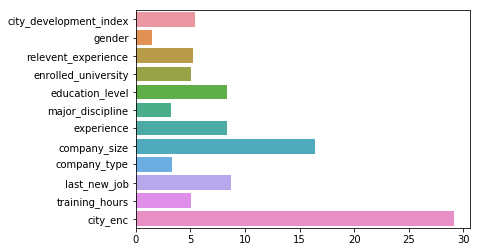

In [235]:
sns.barplot(cat_clf_7.feature_importances_, features_enc)

In [236]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = cat_clf_7.predict_proba(test_df[features_enc])[:,1]
sub.to_csv('data/submissions/cat_enc.csv', index=False)

####  XGBoost model with city_enc column
 0.6784946481122766.

########### n_estimators = 22.000000


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



###### Model Report Train data ######
roc auc score (Train): 0.728565
confuson matrix (Train): 
[[12203  3731]
 [ 1020  1405]]


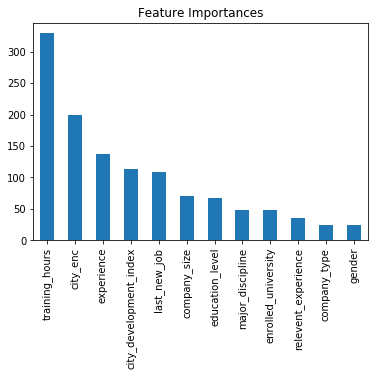

In [270]:
clf2 = xgb.XGBClassifier(objective ='reg:logistic',learning_rate=0.01, max_depth=6, n_estimators=1500, subsample=0.8, colsample_bytree=0.8, gamma=0, min_child_weight= 1, reg_alpha=0.1, scale_pos_weight=6)
clf2 = xgb_bi_cla_modelfit(clf2, train_df, train_df['target'], features_enc, 'auc')

In [271]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = clf2.predict_proba(test_df[features_enc])[:,1]
sub.to_csv('data/submissions/xgb_enc.csv', index=False)

####  LR with city enc
0.6670194578489088.

In [243]:
train_df_enc['city_enc'] = train_df_enc['city'].apply(lambda x: city_enc[x])
test_df_enc['city_enc'] = test_df_enc['city'].apply(lambda x: city_enc[x])

In [244]:
features_lr_enc = [i for i in test_df_enc.columns if i not in ['enrollee_id', 'city']]

In [245]:
lr_clf_2 = LogisticRegression(class_weight= {0: 0.5, 1: 3}, random_state= 21072018)
param_grid_lr_2 = {
    'C': [0.01, 0.1, 0.5, 1, 3, 5],
    'max_iter': [200, 100],
}
lr_fit_2 = GridSearchCV(estimator=lr_clf_2, param_grid=param_grid_lr_2, scoring = roc_scorer, cv=5)
lr_fit_2.fit(train_df_enc[features_lr_enc], train_df_enc['target'].astype('int'))

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 3}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=21072018,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [200, 100], 'C': [0.01, 0.1, 0.5, 1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_scorer, needs_proba=True), verbose=0)

In [246]:
lr_fit_2.best_params_

{'C': 5, 'max_iter': 200}

In [247]:
means = lr_fit_2.cv_results_['mean_test_score']
stds = lr_fit_2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, lr_fit_2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.644 (+/-0.037) for {'max_iter': 200, 'C': 0.01}
0.644 (+/-0.037) for {'max_iter': 100, 'C': 0.01}
0.664 (+/-0.031) for {'max_iter': 200, 'C': 0.1}
0.664 (+/-0.031) for {'max_iter': 100, 'C': 0.1}
0.671 (+/-0.028) for {'max_iter': 200, 'C': 0.5}
0.671 (+/-0.028) for {'max_iter': 100, 'C': 0.5}
0.672 (+/-0.027) for {'max_iter': 200, 'C': 1}
0.672 (+/-0.027) for {'max_iter': 100, 'C': 1}
0.673 (+/-0.026) for {'max_iter': 200, 'C': 3}
0.673 (+/-0.026) for {'max_iter': 100, 'C': 3}
0.673 (+/-0.025) for {'max_iter': 200, 'C': 5}
0.673 (+/-0.025) for {'max_iter': 100, 'C': 5}


In [248]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = lr_fit_2.predict_proba(test_df_enc[features_lr_enc])[:,1]
sub.to_csv('data/submissions/LR_enc.csv', index=False)

####  RF with city_enc
0.6826769673604978.

In [251]:
rf_clf_3 = RandomForestClassifier(n_jobs = -1, class_weight={0: 0.5, 1: 3}, random_state = 21072018, max_depth= 6, max_features= 0.5, n_estimators=800)

In [252]:
rf_clf_3.fit(train_df[features_enc], train_df['target'])

RandomForestClassifier(bootstrap=True, class_weight={0: 0.5, 1: 3},
            criterion='gini', max_depth=6, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=-1, oob_score=False,
            random_state=21072018, verbose=0, warm_start=False)

In [253]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = rf_clf_3.predict_proba(test_df[features_enc])[:,1]
sub.to_csv('data/submissions/rf_enc.csv', index=False)

### # # # # # # # # # # # # # # # # # # # # #
#### correlation between output of model

In [272]:
temp_corr_df = pd.DataFrame(columns=['c_two', 'c_three', 'rf_one', 'x_two', 'lr_one', 'svc_one', 'kn_one', 'cat_enc', 'x_enc', 'lr_enc', 'rf_enc'])

In [273]:
temp_corr_df['c_two'] = pd.read_csv('data/submissions/cat_two.csv')['target']
temp_corr_df['c_three'] = pd.read_csv('data/submissions/cat_three.csv')['target']
temp_corr_df['x_two'] = pd.read_csv('data/submissions/xgb_two.csv')['target']
temp_corr_df['rf_one'] = pd.read_csv('data/submissions/rf_one.csv')['target']
temp_corr_df['lr_one'] = pd.read_csv('data/submissions/lr_one.csv')['target']
temp_corr_df['svc_one'] = pd.read_csv('data/submissions/svc_one.csv')['target']
temp_corr_df['kn_one'] = pd.read_csv('data/submissions/kn_one.csv')['target']
temp_corr_df['cat_enc'] = pd.read_csv('data/submissions/cat_enc.csv')['target']
temp_corr_df['x_enc'] = pd.read_csv('data/submissions/xgb_enc.csv')['target']
temp_corr_df['lr_enc'] = pd.read_csv('data/submissions/LR_enc.csv')['target']
temp_corr_df['rf_enc'] = pd.read_csv('data/submissions/rf_enc.csv')['target']

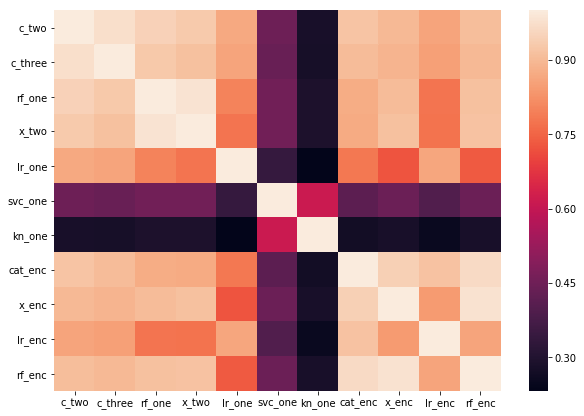

In [274]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(temp_corr_df.corr(), ax=ax)
plt.show()

In [257]:
# take these models cat_two, cat_enc, xgb_enc, lr_enc, rf_enc and stack them

In [263]:
# cat_clf_3 , cat_clf_7, clf2, lr_fit_2, rf_clf_3

In [275]:
train_stack = pd.DataFrame(columns=['cat', 'cat_enc', 'xgb', 'lr', 'rf'])

In [276]:
test_stack = pd.DataFrame(columns=['cat', 'cat_enc', 'xgb', 'lr', 'rf'])

In [277]:
train_stack['cat'] = cat_clf_3.predict_proba(train_df[features])[:,1]
test_stack['cat'] = cat_clf_3.predict_proba(test_df[features])[:,1]

train_stack['cat_enc'] = cat_clf_7.predict_proba(train_df[features_enc])[:,1]
test_stack['cat_enc'] = cat_clf_7.predict_proba(test_df[features_enc])[:,1]

train_stack['xgb'] = clf2.predict_proba(train_df[features_enc])[:,1]
test_stack['xgb'] = clf2.predict_proba(test_df[features_enc])[:,1]

train_stack['lr'] = lr_fit_2.predict_proba(train_df_enc[features_lr_enc])[:,1]
test_stack['lr'] = lr_fit_2.predict_proba(test_df_enc[features_lr_enc])[:,1]

train_stack['rf'] = rf_clf_3.predict_proba(train_df[features_enc])[:,1]
test_stack['rf'] = rf_clf_3.predict_proba(test_df[features_enc])[:,1]

In [278]:
train_stack.head()

cat   cat_enc       xgb        lr        rf
0  0.473072  0.407701  0.478462  0.379020  0.398316
1  0.312419  0.281352  0.457304  0.287380  0.299334
2  0.398721  0.389387  0.486060  0.448745  0.383986
3  0.436965  0.323235  0.470272  0.295915  0.326164
4  0.585390  0.658297  0.526375  0.659953  0.662551

In [279]:
test_stack.head()

cat   cat_enc       xgb        lr        rf
0  0.783997  0.831343  0.559355  0.966891  0.774480
1  0.344395  0.303276  0.460203  0.296326  0.315073
2  0.742501  0.733222  0.546388  0.686105  0.735011
3  0.348219  0.302171  0.449076  0.295600  0.279634
4  0.357987  0.173870  0.450979  0.243277  0.258276

### stack 0.655260341444245

########### n_estimators = 31.000000

###### Model Report Train data ######
roc auc score (Train): 0.803041
confuson matrix (Train): 
[[12225  3709]
 [  817  1608]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


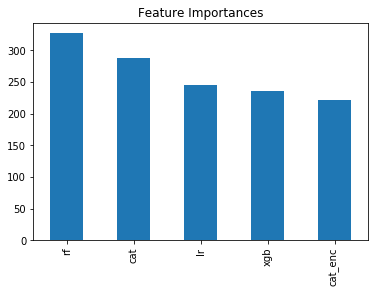

In [280]:
clf_stack_1 = xgb.XGBClassifier(objective ='reg:logistic',learning_rate=0.1, max_depth=6, n_estimators=1500, subsample=0.8, colsample_bytree=0.6, gamma=0, min_child_weight= 1, reg_alpha=0.1, scale_pos_weight=6)
clf_stack_1 = xgb_bi_cla_modelfit(clf_stack_1, train_stack, train_df['target'], train_stack.columns, 'auc')

In [282]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = clf_stack_1.predict_proba(test_stack)[:,1]
sub.to_csv('data/submissions/stack1.csv', index=False)

#### catboost stack 0.666449583840344

In [283]:
cat_stack1 = cb.CatBoostClassifier(
        l2_leaf_reg=3,
        learning_rate=0.01,
        eval_metric='AUC',
        random_seed=21072018,
        class_weights = [0.5, 3],
        iterations = 1500,
        depth = 8,
    )
# learn: 0.7670306	test: 0.7388245	best: 0.7388245 (419)

In [284]:
cv_data = cb.cv(cb.Pool(train_stack, train_df['target']), cat_stack1.get_params(), stratified=True, nfold=10)

0:	learn: 0.7218204	test: 0.7169434	best: 0.7169434 (0)	total: 202ms	remaining: 5m 2s
1:	learn: 0.7305872	test: 0.7240099	best: 0.7240099 (1)	total: 397ms	remaining: 4m 57s
2:	learn: 0.7335446	test: 0.7269668	best: 0.7269668 (2)	total: 644ms	remaining: 5m 21s
3:	learn: 0.7341827	test: 0.7285101	best: 0.7285101 (3)	total: 865ms	remaining: 5m 23s
4:	learn: 0.7347829	test: 0.7295770	best: 0.7295770 (4)	total: 1.07s	remaining: 5m 19s
5:	learn: 0.7352980	test: 0.7295578	best: 0.7295770 (4)	total: 1.35s	remaining: 5m 37s
6:	learn: 0.7359491	test: 0.7300210	best: 0.7300210 (6)	total: 1.58s	remaining: 5m 37s
7:	learn: 0.7362434	test: 0.7303897	best: 0.7303897 (7)	total: 1.81s	remaining: 5m 36s
8:	learn: 0.7370329	test: 0.7309430	best: 0.7309430 (8)	total: 2.03s	remaining: 5m 35s
9:	learn: 0.7372015	test: 0.7312534	best: 0.7312534 (9)	total: 2.23s	remaining: 5m 31s
10:	learn: 0.7372631	test: 0.7314123	best: 0.7314123 (10)	total: 2.45s	remaining: 5m 32s
11:	learn: 0.7375258	test: 0.7314544	best:

In [285]:
cat_stack1.set_params(**{'iterations': 422})
cat_stack1.get_params()

{'class_weights': [0.5, 3],
 'depth': 8,
 'eval_metric': 'AUC',
 'iterations': 422,
 'l2_leaf_reg': 3,
 'learning_rate': 0.01,
 'loss_function': 'Logloss',
 'random_seed': 21072018}

In [287]:
cat_stack1.fit(train_stack, train_df['target'])

0:	learn: 0.7270087	total: 87.9ms	remaining: 37s
1:	learn: 0.7290110	total: 151ms	remaining: 31.7s
2:	learn: 0.7317863	total: 231ms	remaining: 32.2s
3:	learn: 0.7333814	total: 318ms	remaining: 33.2s
4:	learn: 0.7340643	total: 408ms	remaining: 34s
5:	learn: 0.7357120	total: 496ms	remaining: 34.4s
6:	learn: 0.7355383	total: 586ms	remaining: 34.7s
7:	learn: 0.7357020	total: 670ms	remaining: 34.7s
8:	learn: 0.7357285	total: 758ms	remaining: 34.8s
9:	learn: 0.7356732	total: 855ms	remaining: 35.2s
10:	learn: 0.7356466	total: 939ms	remaining: 35.1s
11:	learn: 0.7360220	total: 1.02s	remaining: 35s
12:	learn: 0.7361549	total: 1.1s	remaining: 34.5s
13:	learn: 0.7365644	total: 1.17s	remaining: 34.2s
14:	learn: 0.7366899	total: 1.26s	remaining: 34.2s
15:	learn: 0.7368016	total: 1.35s	remaining: 34.2s
16:	learn: 0.7372273	total: 1.43s	remaining: 34.1s
17:	learn: 0.7373540	total: 1.52s	remaining: 34s
18:	learn: 0.7373149	total: 1.59s	remaining: 33.8s
19:	learn: 0.7374640	total: 1.67s	remaining: 33.6

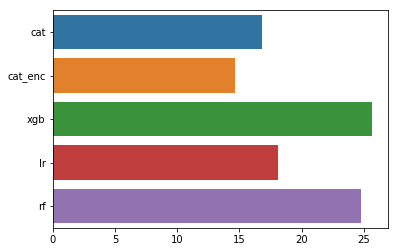

In [288]:
sns.barplot(cat_stack1.feature_importances_, train_stack.columns)

In [289]:
# Make submission 0.681516875725768
sub = pd.read_csv('data/submissions/sample_submission.csv')
sub['target'] = cat_stack1.predict_proba(test_stack)[:,1]
sub.to_csv('data/submissions/cat_stack1.csv', index=False)

In [ ]:
# cat_stack1 is the final model

In [3]:
# https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

In [ ]:
# corelation
# https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/23849
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas